In [1]:
### THIS IS JUST FOR A MORE PRACTICAL AND FANCY NOTEBOOK
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 99%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
##################################################

# Pygemmes, modules, models, concepts and aggregates

## Paul Valcke

### EJP internal workshop

The goal of this session is : 
1. pygemmes can run on your computer
2. You know what are the properties of `pgm` and `hub`, how they work
3. You know how to :
    * get the knowledge of what is available
    * load the model you want, with a preset if you want
    * modify parameters and conditions
    * run simulations
    * do deeper analysis
    * plot data
4. You can write your own model

## Before everything : Import

* **pygemmes** can be downloaded on https://github.com/DaluS/GEMMES (branch : devel). The repo is private you need to give me your github pseudo to get it. 
* your python must know where to load the library, either define your "GEMMES" folder as original path, or execute the line under it.

you will need the following library : numpy, scipy, matplotlib, pyvis 


In [2]:
import sys 

# Install all dependencies
#!{sys.executable} -m pip install numpy scipy matplotlib pyvis 

# Change path as the folder adress you have put the library in 
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm


#####################################################################################
 _______            ______  ________  ____    ____  ____    ____  ________   ______    
|_   __ \         .' ___  ||_   __  ||_   \  /   _||_   \  /   _||_   __  |.' ____  \   
  | |__) |_   __ / .'   \_|  | |_ \_|  |   \/   |    |   \/   |    | |_ \_|| (___ \_|  
  |  ___/[ \ [  ]| |   ____  |  _| _   | |\  /| |    | |\  /| |    |  _| _  _.____`.   
 _| |_    \ '/ / \ `.___]  |_| |__/ | _| |_\/_| |_  _| |_\/_| |_  _| |__/ || \____) |  
|_____| [\_:  /   `._____.'|________||_____||_____||_____||_____||________| \______.'  
         \__.'                           
#####################################################################################                                                                                                                                   

Welcome in Pygemmes, a modular library to prototype and study dynamical systems !
This library is oriented toward generation

## What is Pygemmes ? 

A differential system solver with "extra steps" :
* library of models
* Easy model creation, modification, coupling, tweaking 
* Automatic space allocation, resolution order
* Model summary, representation...
* Plots, analysis of cycles, sensibility


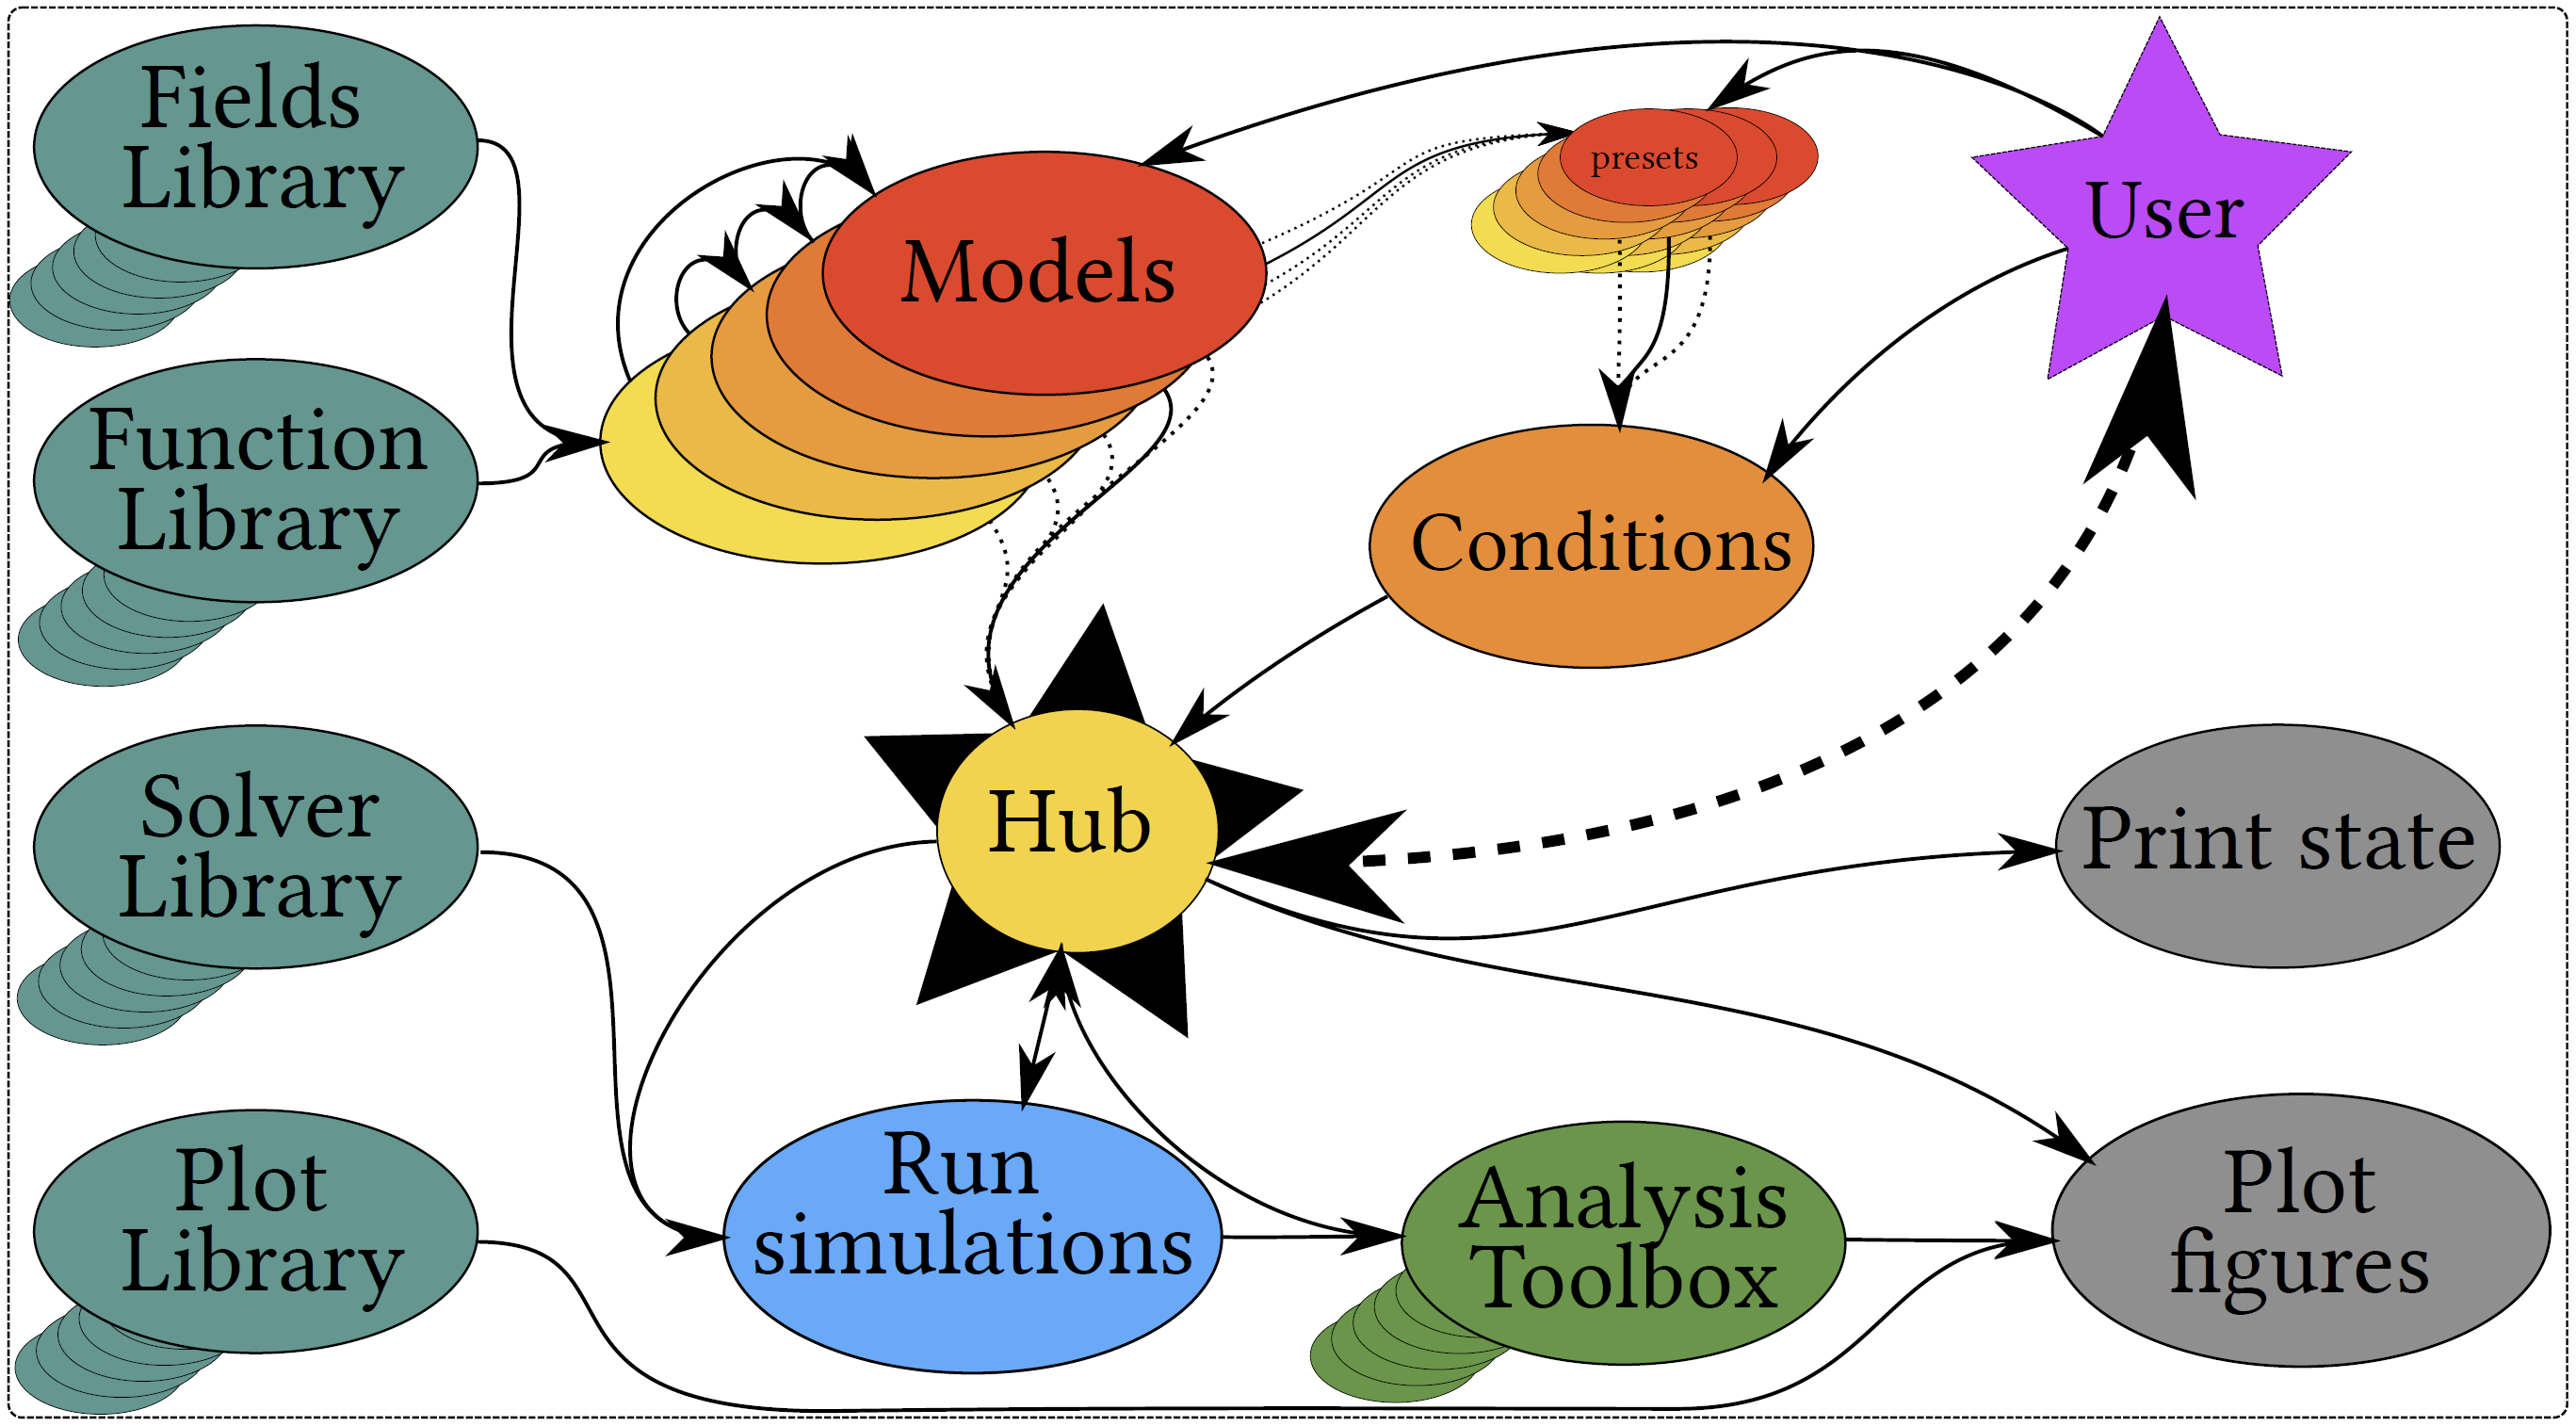

## pgm toolkit (before hub)

**ALWAYS USE TAB, AUTOINDENTATION, HELP( ), ? When exploring a library**

In [53]:
help(pgm)

Help on package pygemmes:

NAME
    pygemmes

DESCRIPTION
    #####################################################################################
     _______            ______  ________  ____    ____  ____    ____  ________   ______
    |_   __ \         .' ___  ||_   __  ||_   \  /   _||_   \  /   _||_   __  |.' ____    | |__) |_   __ / .'   \_|  | |_ \_|  |   \/   |    |   \/   |    | |_ \_|| (___ \_|
      |  ___/[ \ [  ]| |   ____  |  _| _   | |\  /| |    | |\  /| |    |  _| _  _.____`.
     _| |_    \ '/ / \ `.___]  |_| |__/ | _| |_\/_| |_  _| |_\/_| |_  _| |__/ || \____) |
    |_____| [\_:  /   `._____.'|________||_____||_____||_____||_____||________| \______.'
             \__.'
    #####################################################################################
    
    Welcome in Pygemmes, a modular library to prototype and study dynamical systems !
    This library is oriented toward generation of macroeconomic complexity models
    You can find the files on https://g

In [4]:
### List of the methods and objects in the library 
for m in [f for f in dir(pgm) if f[0]!='_']: print(m)

Hub
generate_dic_distribution
generate_preset_from_model_preset
get_available_fields
get_available_functions
get_available_models
get_available_output
get_available_plots
get_available_solvers
load
os
plots


## Map of the library
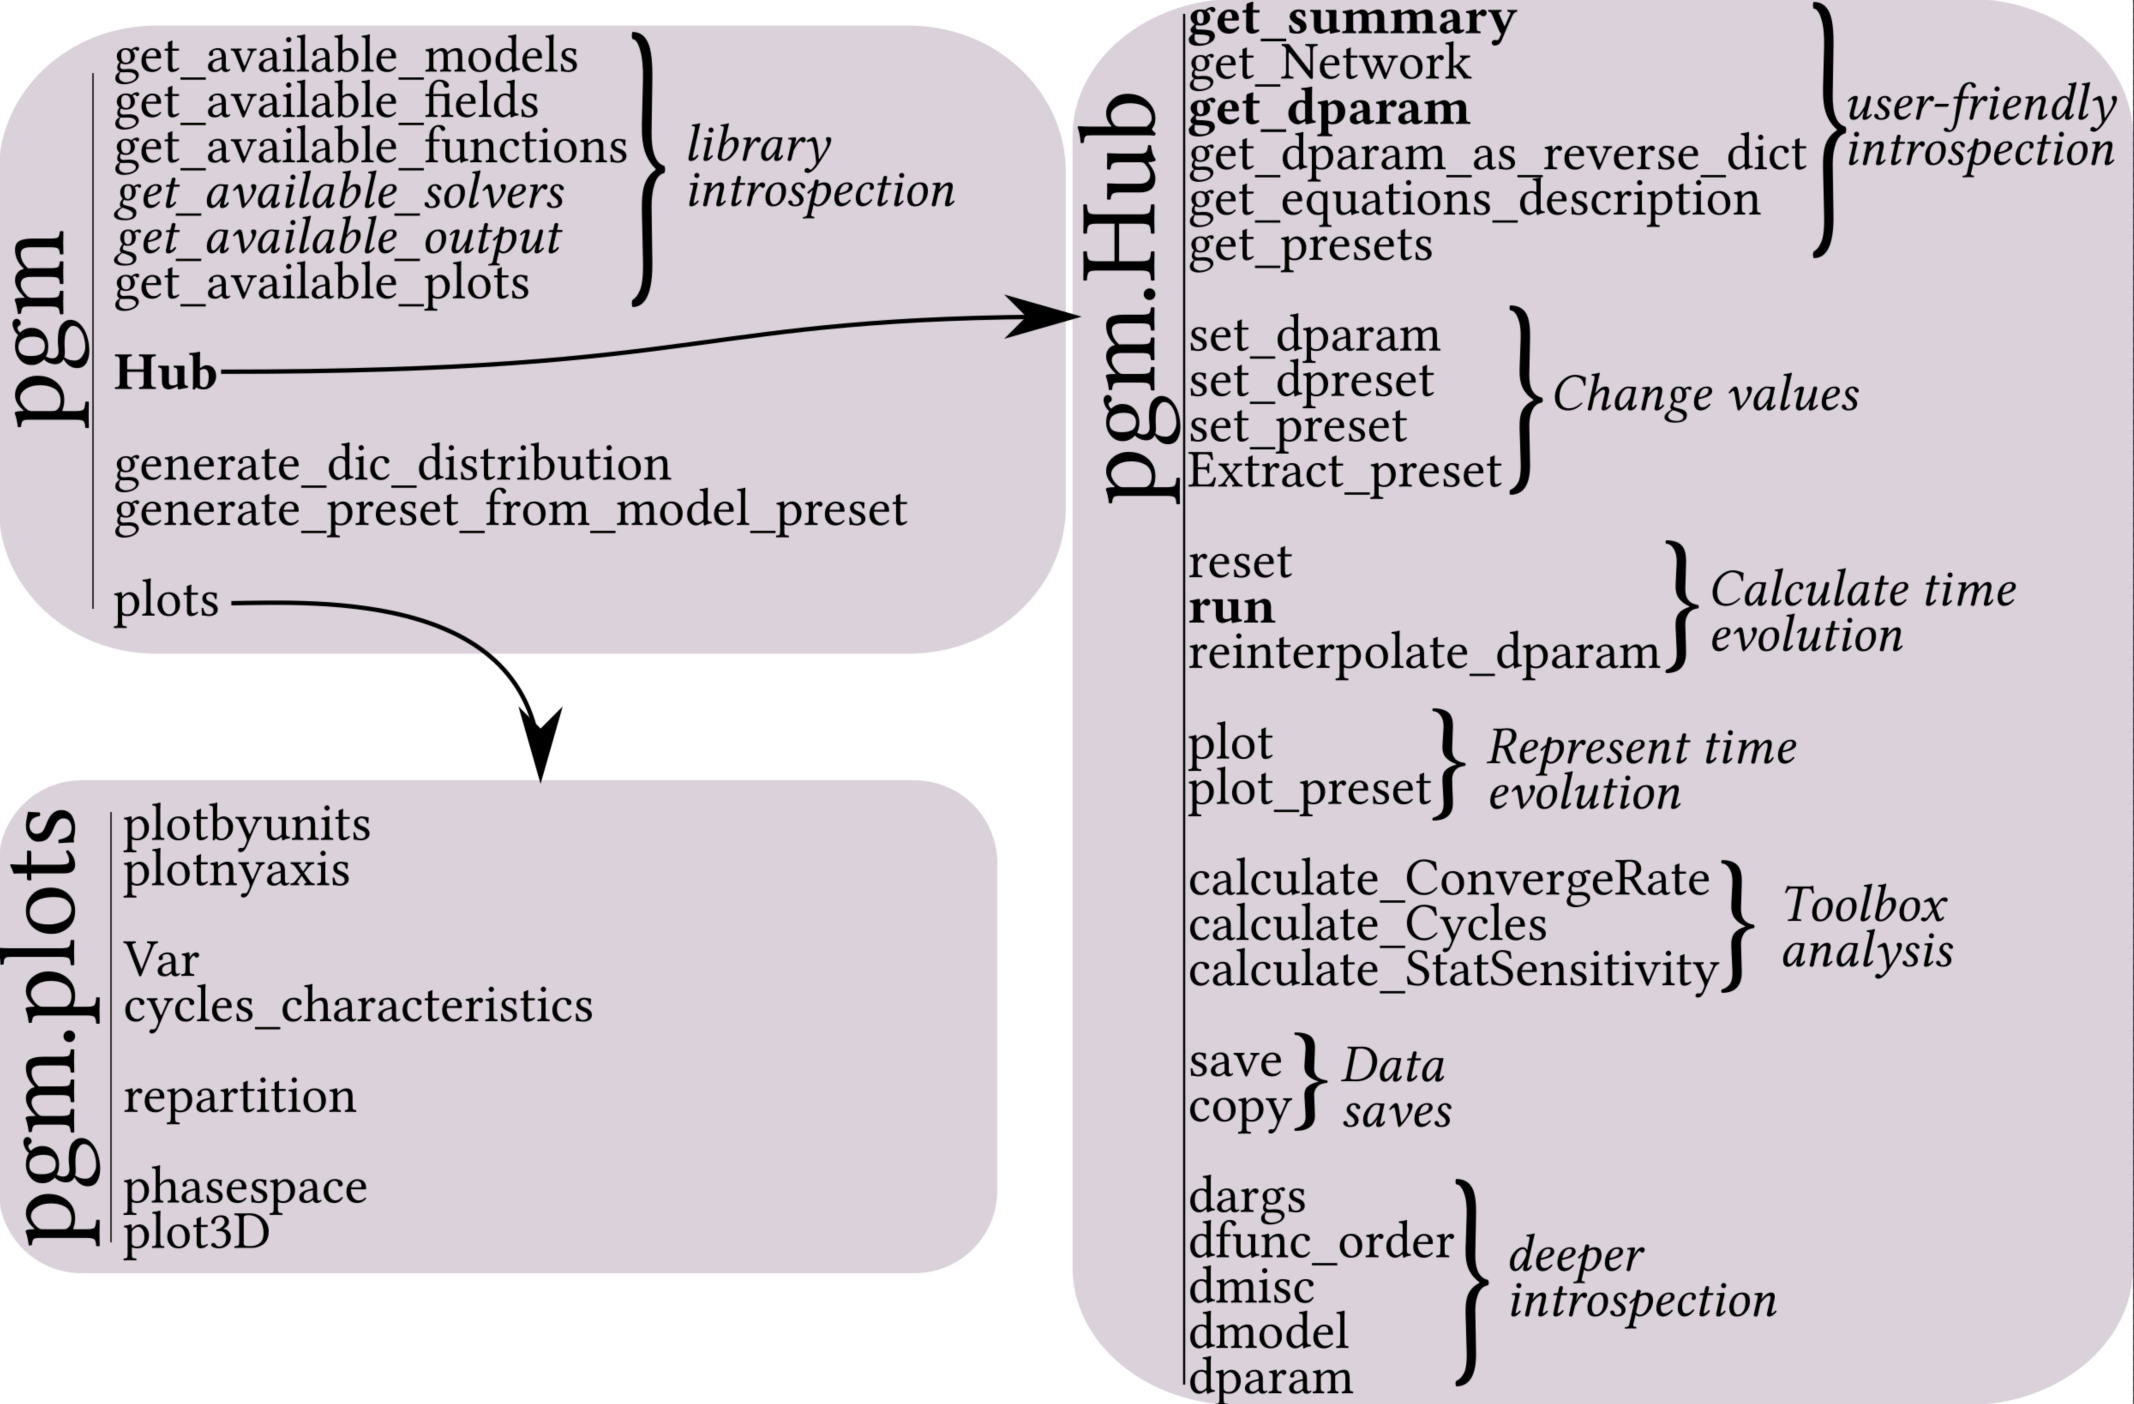

## The "get" methods
A lot of things are already coded in pygemmes so that you do not have to code them. There are multiple categories : 
* **Model files**, containing the endogenisation loops of your system (the equations), an ensemble of preset of values and associated plots
* **solvers**, to do temporal run of your set of equations 
* **fields**, an ensemble of definitions and basic value that can be shared through models (units, symbol, definitions, default values...) 
* **functions**, an ensemble of equations linking fields that can be called easily (a Philips curve, a population growth...)
* **plot**, an ensemble of custom-made plots that can be called easily for this architecture
* **output**, an ensemble of presaved runs (disactivated in 0.9)

### Get available models 
Those model are already coded, and have preset and plots associated to them ! 
You can use them directly to see what other modellers have done, 

In [54]:
help(pgm.get_available_models)

Help on function get_available_models in module pygemmes._models:

get_available_models(model=None, details=False, returnas=None, verb=None, from_user=False)
    Check all models available in pygemmes, and gives back the information that are asked.
    With no arguments, it prints everything it can
    
    Parameters
    ----------
    model : Name of the models you are intereted in
    details : Boolean
    returnas : dict, none, list depending of what you need
    verb : print or not !
    from_user : TYPE, optional



In [55]:
pgm.get_available_models(details=False)

The following models are available from 'C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models'

 FOLDER                   | MODEL NAME           | Presets
############################################################
                          | TUTORIAL             | ['presetname1']
 Components               | Climate_3Layers      | ['default']
 Core                     | CHIMES               | ['GoodwinPURE', 'Bi-sectoral']
 Core                     | Goodwin              | ['default', 'many-orbits']
 Core                     | GoodwinFull          | ['default', 'many-orbits']
 Extended                 | GK                   | ['default', 'farfromEQ', 'crisis']
 Extended                 | Goodwin-PiInPhi      | ['zpi']
 Extended                 | Goodwin_CES          | ['CES']
 GEMMES                   | GEMMES_Coping2018    | ['BAU', 'BAU_DAM', 'TRANSITION']
 Miscellaneous            | stochastic           | ['Onevar', '10']
 Miscellaneous\Agents     | Agents               | ['default'

In [56]:
pgm.get_available_models('reduced_G',details=True)



###############################
########## reduced_G ##########

It is the reduced version of a Goodwin model, with another writing : when the model is established,
one can rather than calculate (N,a,K,w), calculate the dynamics only on employment and wage share.
In consequence it is a 2- differential equation model, but with the same dynamics as _model_goodwin.

The rest of the documentation is in _model_Goodwin

LINKTOARTICLE:

Created on Wed Jul 21 15:11:15 2021
@author: Paul Valcke


####Variables ####:
#differential variables (2):
	-  employment :employment rate
	-  omega :     wage share
# State Variables (1):
	-  phillips :  Wage inflation rate

#### ADDED Parameters #### (0):


####presets:


file: C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\ReducedSystem\_model_reduced_G.py



In [57]:
pgm.get_available_models(details=True)



##############################
########## TUTORIAL ##########

THIS DOCSTRING IS THE DESCRIPTION OF THE MODEL.
PUT EVERYTHING YOU WANT THE USER TO KNOW BEFORE HE LOADS THE MODEL.

Typically :
* Model name
* what is does : logistic crisis, climate damage, multiple sectors, regions...
* What are the hypotheses :
* Main properties : Cycles, equilibrium, phase-change...

@URL:
@author: Paul Valcke
TODO:
    - EVERYTHING you want to change
    - ...


####Variables ####:
#differential variables (4):
	-  a :         Productivity
	-  N :         Population of people able to work
	-  K :         Capital
	-  w :         Wage value
# State Variables (14):
	-  Y :         GDP in output quantity
	-  L :         Workers
	-  phillips :  Wage inflation rate
	-  I :         Investment in money
	-  Ir :        Number of real unit from investment
	-  C :         
	-  W :         
	-  pi :        relative profit
	-  employment :employment rate
	-  omega :     wage share
	-  GDP :       GDP in output qu

## The other "get"

will be explained in due time
* get_available_fields
* get_available_functions
* get_available_output
* get_available_plots
* get_available_solvers

In [58]:
pgm.get_available_solvers()

IN THIS VERSION, ONLY THE RK4 HOMEMADE SOLVER IS ACTIVE
key              type      step   comments             source                                                                      
---------------  --------  -----  -------------------  ----------------------------------------------------------------------------
'eRK4-homemade'  explicit  fixed  Runge_Kutta order 4  C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_utilities\_solvers.py


In [59]:
pgm.get_available_output()

File selection criteria:
	- path: C:\Users\Paul Valcke\.pygemmes\output

Available files matching criteria:
	- C:\Users\Paul Valcke\.pygemmes\output\Output_GK_default_eRK4-homemade_placeholder_Paul Valcke_20221012-175306.npz
	- C:\Users\Paul Valcke\.pygemmes\output\Output_GK_default_eRK4-homemade_placeholder_Paul Valcke_20221013-214516.npz
	- C:\Users\Paul Valcke\.pygemmes\output\Output_GK_default_eRK4-homemade_placeholder_Paul Valcke_20221018-224651.npz


In [11]:
pgm.get_available_functions()

found 11 groups of functions :
------------------------------------------------------------------------------------
---- group : Atmosphere ------------------------------------------------------------
Modelisation of an atmosphere, with CO2 and Temperature
   ---- Subgroup : Three_Layers ------------------------------------------------------------
    As presented in CopingWithCollapse    
name   com                             function                                                         
-----  ------------------------------  -----------------------------------------------------------------
CO2AT  3-Layer dynamics (Atmosphere)    (1./3.666)*Emission - phi12*CO2AT + phi12*CAT/CUP*CO2UP,        
CO2LO  3-Layer dynamics (lower ocean)   phi23*CO2UP - phi23*CUP/CLO*CO2LO,                              
CO2UP  3-Layer dynamics (Upper ocean)   phi12*CO2AT - CO2UP*(phi12*CAT/CUP-phi23) + phi23*CUP/CLO*CO2LO,
T      Forcing and ocean dynamics       (F - rhoAtmo*T - gammaAtmo*(T-T0))/Capacit

In [12]:
pgm.get_available_plots()

##### Var ###############################################
(hub, key, idx=0, Region=0, mode=False, log=False, title='')

    Just one variable plot, with possibly cycles analysis to be shown
    if you put [key,sectorname] it will load the specific sector
    if mode = 'sensitivity' the system will show statistical variance between parrallel run of nx
    if mode = 'cycles' the system will show cycles within the evolution of the variable with their characteristics
    
##### cycles_characteristics ############################
(hub, xaxis='omega', yaxis='employment', ref='employment', type1='frequency', normalize=False, Region=0, title='')

    Plot frequency and harmonicity for each cycle found in the system

    xaxis='omega',
    yaxis='employment',
    ref='employment',
   type1 and type2 should be in 't_mean_cycle':
                                'period_T':,
                                'medval': ,
                                'stdval':,
                                'minv

In [13]:
pgm.get_available_fields()

150 fields in the library 

Field                  definition                                             group                value                  units                     In model
---------------------  -----------------------------------------------------  -------------------  ---------------------  ------------------------  --------
N                      Population of people able to work                      Household            1.0                    Humans                            
L                      Workers                                                Household            None                   Humans                            
a                      Productivity                                           Household            1.0                    Units.Humans^{-1}.y^{-1}          
w                      Wage value                                             Household            0.85                   $.Humans^{-1}.y^{-1}              
Omega                  Individ

## DOING THE REAL STUFF 

Now we will load a model, and see what we can do with it

The **MOST IMPORTANT** element of pygemmes is the **Hub**. You will call it with a model inside of it, then interact with the model through the Hub.

In [60]:
help(pgm.Hub)

Help on class Hub in module pygemmes._core:

class Hub(builtins.object)
 |  Hub(model, from_user=False, preset=None, dpresets=None, verb=True)
 |  
 |  MOST IMPORTANT OBJECT FOR THE USER.
 |  given a model name, it will load it and get its logics, presets and associated values.
 |  It will :
 |      * identify what are the parameters, the state variables, the differential variables
 |      * find their associated properties (definition, units, values)
 |      * find an order of calculation
 |  
 |  You then access to fields value modification, the structure and properties in the model,
 |  simulation, plots, deeper analysis...
 |  
 |  INPUTS :
 |  * model : STRING containing the model name
 |  * from_user : BOOLEAN if you want to use your file (True) or the one provided in pygemmes (False)
 |  * preset : DICTIONNARY name of the preset in the actual dictionnary of preset
 |  * dpreset : DICTOFDICTOFDIC a dictionnary of preset one can use (see model creation)
 |  * verb : BOOLEAN True f

In [61]:
modellist= pgm.get_available_models(details=False,returnas=list) 
print('Available models :\n')
modellist

Available models :



['Agents',
 'Agents_Vicsek',
 'CHIMES',
 'Climate_3Layers',
 'GEMMES_Coping2018',
 'GK',
 'Goodwin',
 'Goodwin-PiInPhi',
 'GoodwinFull',
 'Goodwin_CES',
 'LorenzSystem',
 'PDE-Diffusion',
 'PDE-Diffusion2D',
 'PDE-Waves',
 'TUTORIAL',
 'reduced_G',
 'reduced_GK',
 'reduced_GKCES',
 'reduced_G_KVL',
 'reduced_G_stochastic',
 'stochastic']

A model is : 
* an ensemble of fields, quantities describing physical or informational values (temperature, employment)
* an equation associated to each of the field, determining its value over time, and how each fields are related to each others

there are three categories of possible equations : 
* **parameter :** the value is a constant (example, the gravitational constant, or the size of Mount Everest in a short-run simulation)
* **state variable :** the value is fully determined by every other fields ( the employment is determined by the quantity of workers and the population able to work, two other fields)
* **differential variables :** the variation of the value is a state variable : think about stock and flows : the variation of the stock is computed through the sum of the flow

It is possible that a same field is a parameter in some model (exogenous, constant), a state variable in other (instant adaptation), or a differential in others 

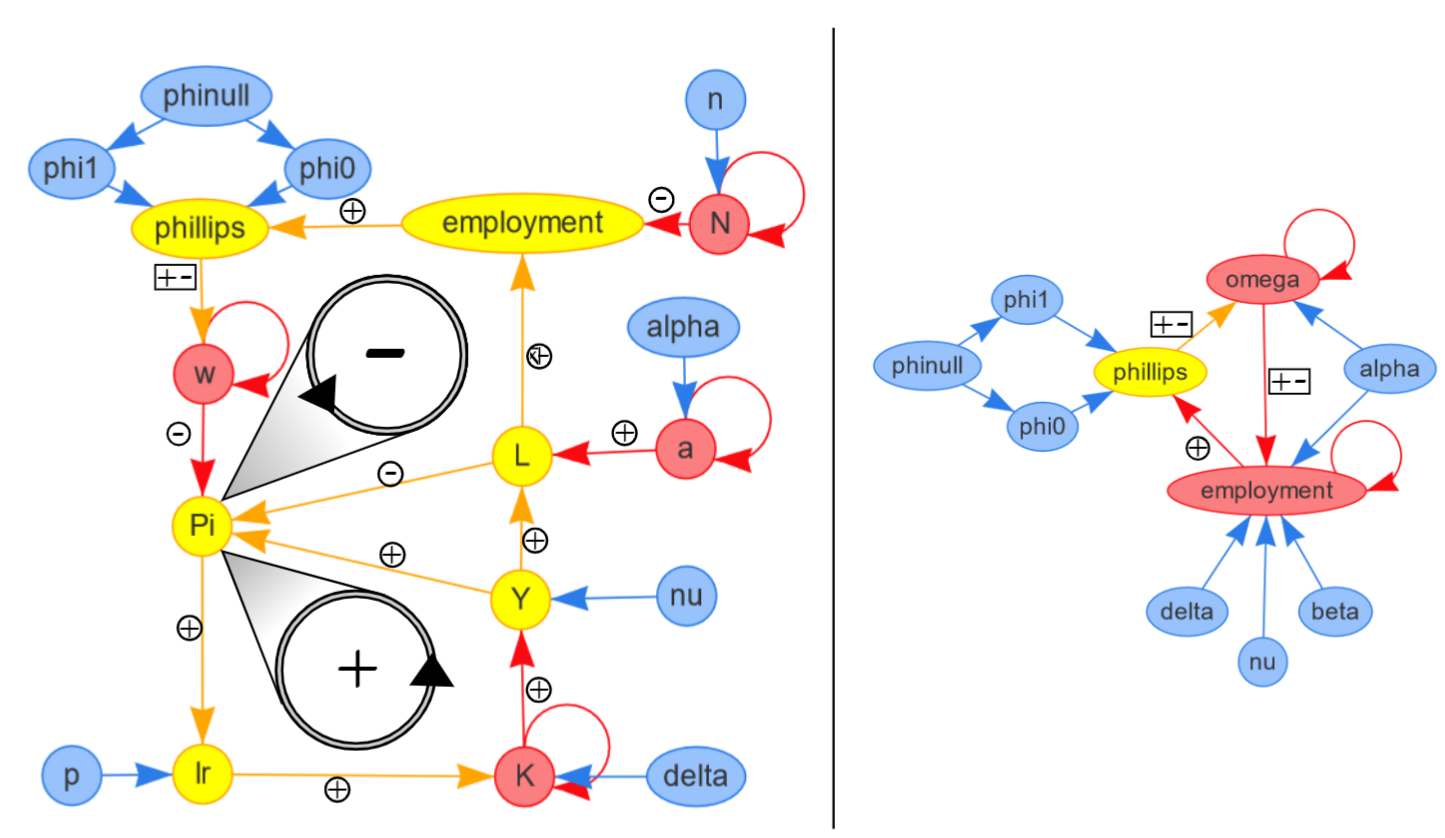

Here parameters are in blue, state variable yellow, differential variable in red. 
An simple criteria to know if it is an interesting model is "a model with loop in it, both positive and negative". 
On the left, the system is a Goodwin will its "extensive" equations, and on the right the dynamics on the phase-space. Both will solve the same overall thing

### What is the hub initialization doing ? 

* Find what are all the fields that exist in the system
* Determine if they are differential, state variable, parameters
* Try to find as many existing information as possible (typically in a file called `_def_fields`) that has not been put by the model creator but exist in a common database. It can be :
    * units 
    * symbol
    * definition 
    * default value
    * ...
* Find an order to calculate the system at each timestep, and what variables are necessary (in loops)
* Preparing allocation for future time calculation
* A bit of coffee

In [4]:
hub=pgm.Hub('GK')

The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'gammai', 'nu', 'r', 'k0', 'k1', 'k2', 'mu', 'eta', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['C', 'W', 'omega', 'g', 'd']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'inflation', 'd', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g']
	- differential: ['a', 'N', 'K', 'w', 'D', 'p', 'time']


In [64]:
hub.get_summary()  # definition concern the field definition, com the way it is calculated

############################################################
####################      SUMMARY       ####################
############################################################
Model       : GK

DESCRIPTION : This is a Goodwin model with possibility to get loans at the bank, and have a price dynamics.
              As described by keen + inflation

TYPICAL BEHAVIOR : Convergence toward solow point ( good equilibrium) or debt crisis
LINKTOARTICLE:

@author: Paul Valcke

File        : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Extended\_model_GK.py
####################       Fields       ####################
statevar        017 ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'inflation', 'd', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g']
differential    007 ['a', 'N', 'K', 'w', 'D', 'p', 'time']
parameters      020 ['alpha', 'n', 'delta', 'gammai', 'nu', 'r', 'k0', 'k1', 'k2', 'mu', 'eta', 'phinull', 'phi0', 'phi1']
####################      Presets       ######

In [65]:
hub.get_equations_description()

############# DIFFERENTIAL EQUATIONS ###########
###  a  ###########
Units        : Units.Humans^{-1}.y^{-1}
Equation     : da/dt= a*alpha,
definition   : Productivity
units        : Units.Humans^{-1}.y^{-1}
Comment      : ODE exogenous, exponential
Dependencies :
     a         Units.Humans^{-1}.y^{-1}  Productivity
     alpha     y^{-1}    Rate of productivity increase
 
###  N  ###########
Units        : Humans
Equation     : dN/dt= N * n,
definition   : Population of people able to work
units        : Humans
Comment      : ODE exogenous exponential
Dependencies :
     N         Humans    Population of people able to work
     n         y^{-1}    Rate of population growth
 
###  K  ###########
Units        : Units
Equation     : dK/dt= Ir - K * delta,
definition   : Capital
units        : Units
Comment      : Capital evolution from investment and depreciation
Dependencies :
     Ir        Units.y^{-1}  Number of real unit from investment
     K         Units     Capital
     delta  

In [5]:
hub.get_Network()

In [6]:
hub.get_Network(params=True)                    # state,differential,parameters
#hub.get_Network(auxilliary=False,params=True)   # remove auxilliary statevar and differential
#hub.get_Network(filters=('Pi',))                # remove the variable Pi and its connexions
#hub.get_Network(filters=('Pi',),redirect=True)  # all connexions from Pi are reconnected

### Doing a run without changing values 
Once the initial state is well determined, you can let the system loop on itself

In [68]:
help(hub.run)

Help on method run in module pygemmes._core:

run(N=False, verb=None) method of pygemmes._core.Hub instance
    Run the simulation, with any of the solver existing in :
        - pgm.get_available_solvers(returnas=list)
        Verb will have the following behavior :
        - none no print of the step
        - 1 at every step
        - any float (like 1.1) the iteration is written at any of these value
    
    AFTER THE RUN
    if you define N, the system will reinterpolate the temporal values on N samples
    typically, N=Tmax will put 1 value per year
    
    Compute each time step from the previous one using:
        - parameters
        - differentials (ode)
        - intermediary functions in specified func_order



In [7]:
hub.run() # Will calculate 10 000 steps (100 year run) of a Goodwin-Keen system given the initial conditions

time step 2355 / 10000
time step 4638 / 10000
time step 7176 / 10000
time step 9772 / 10000
time step 10000 / 10000


### The basic plot : temporal, grouped by units
for the moment we do not talk about region, idx, sectors, which are properties for more advanced systems !

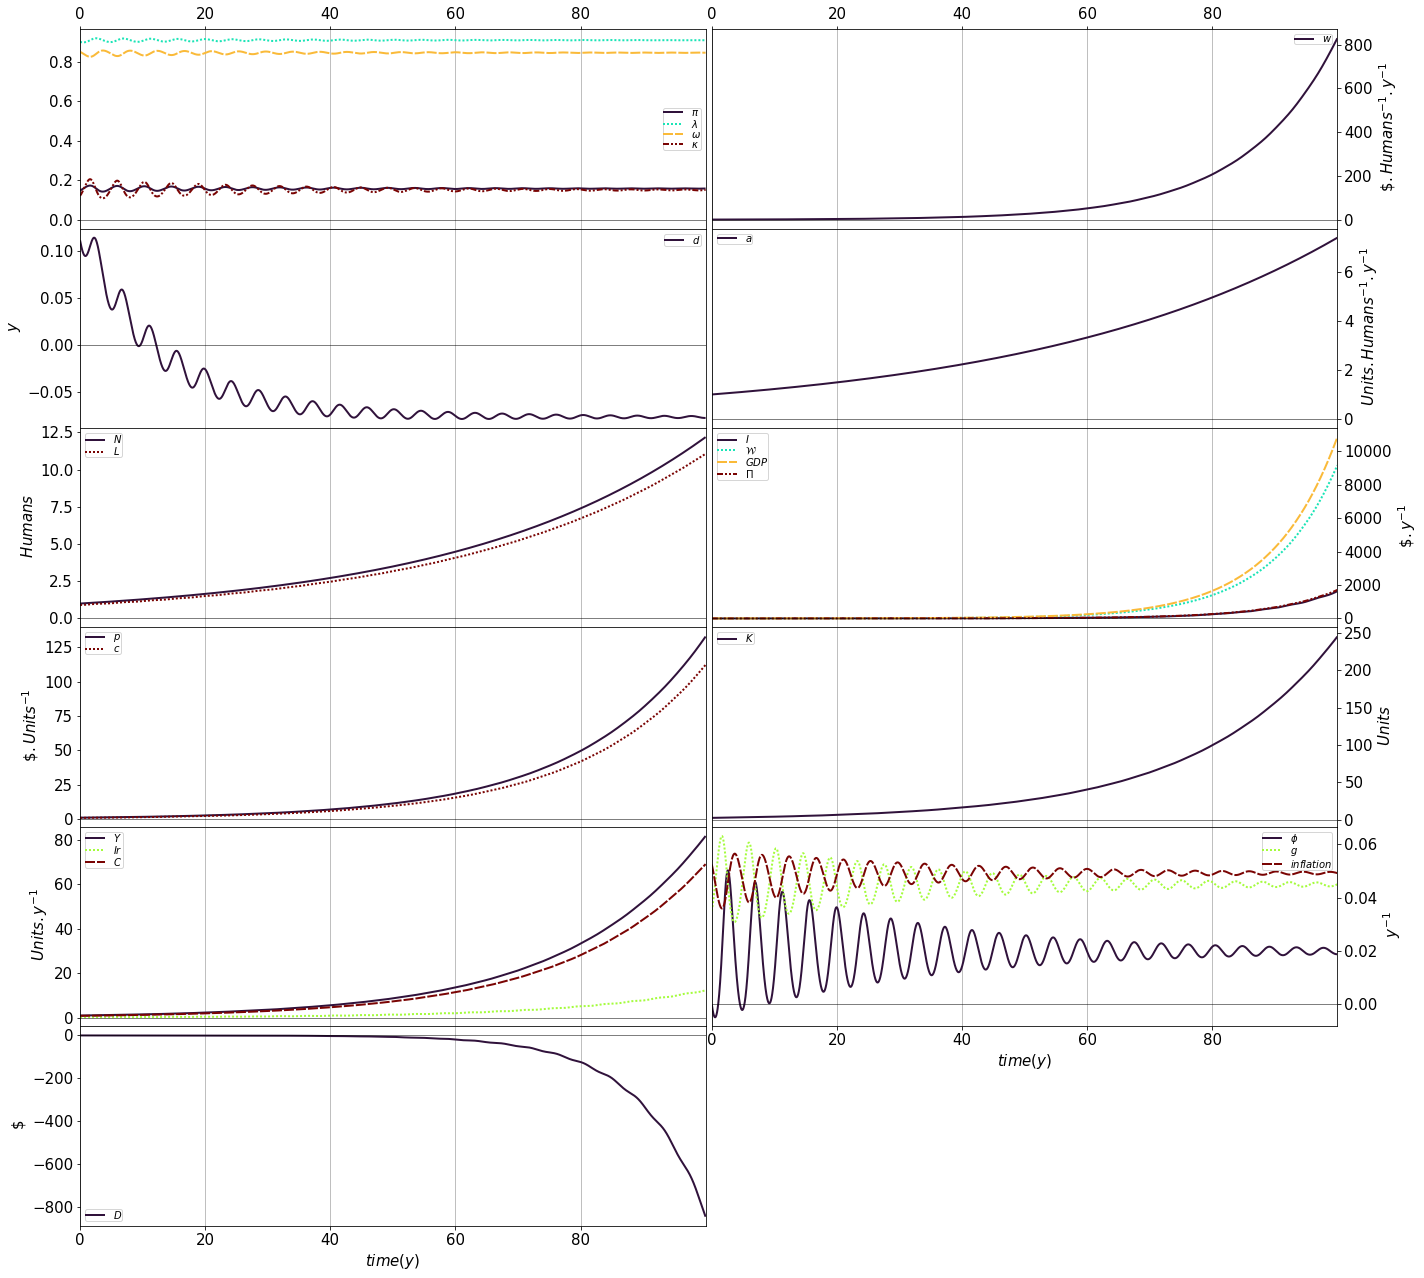

Help on method plot in module pygemmes._core:

plot(filters_key=(), filters_units=(), filters_sector=(), separate_variables={}, idx=0, Region=0, title='', lw=2) method of pygemmes._core.Hub instance
    generate one subfigure per set of units existing.
    
    There are three layers of filters, each of them has the same logic :
    if the filter is a tuple () it exclude the elements inside,
    if the filter is a list [] it includes the elements inside.
    
    Filters are the following :
    filters_units      : select the units you want
    filters_sector     : select the sector you want  ( '' is all monosetorial variables)
    filters_sector     : you can put sector names if you want them or not. '' corespond to all monosectoral variables
    separate_variables : key is a unit (y , y^{-1}... and value are keys from that units that will be shown on another graph,
    
    Region             : is, if there a multiple regions, the one you want to plot
    idx                : is the 

In [8]:
hub.plot()
help(hub.plot)

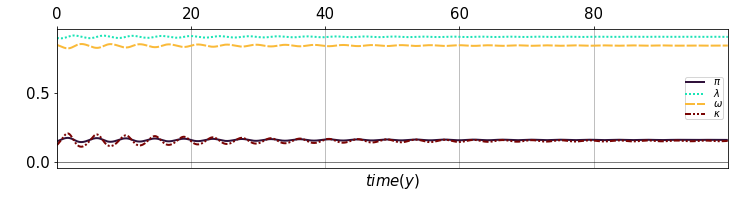

##################################################


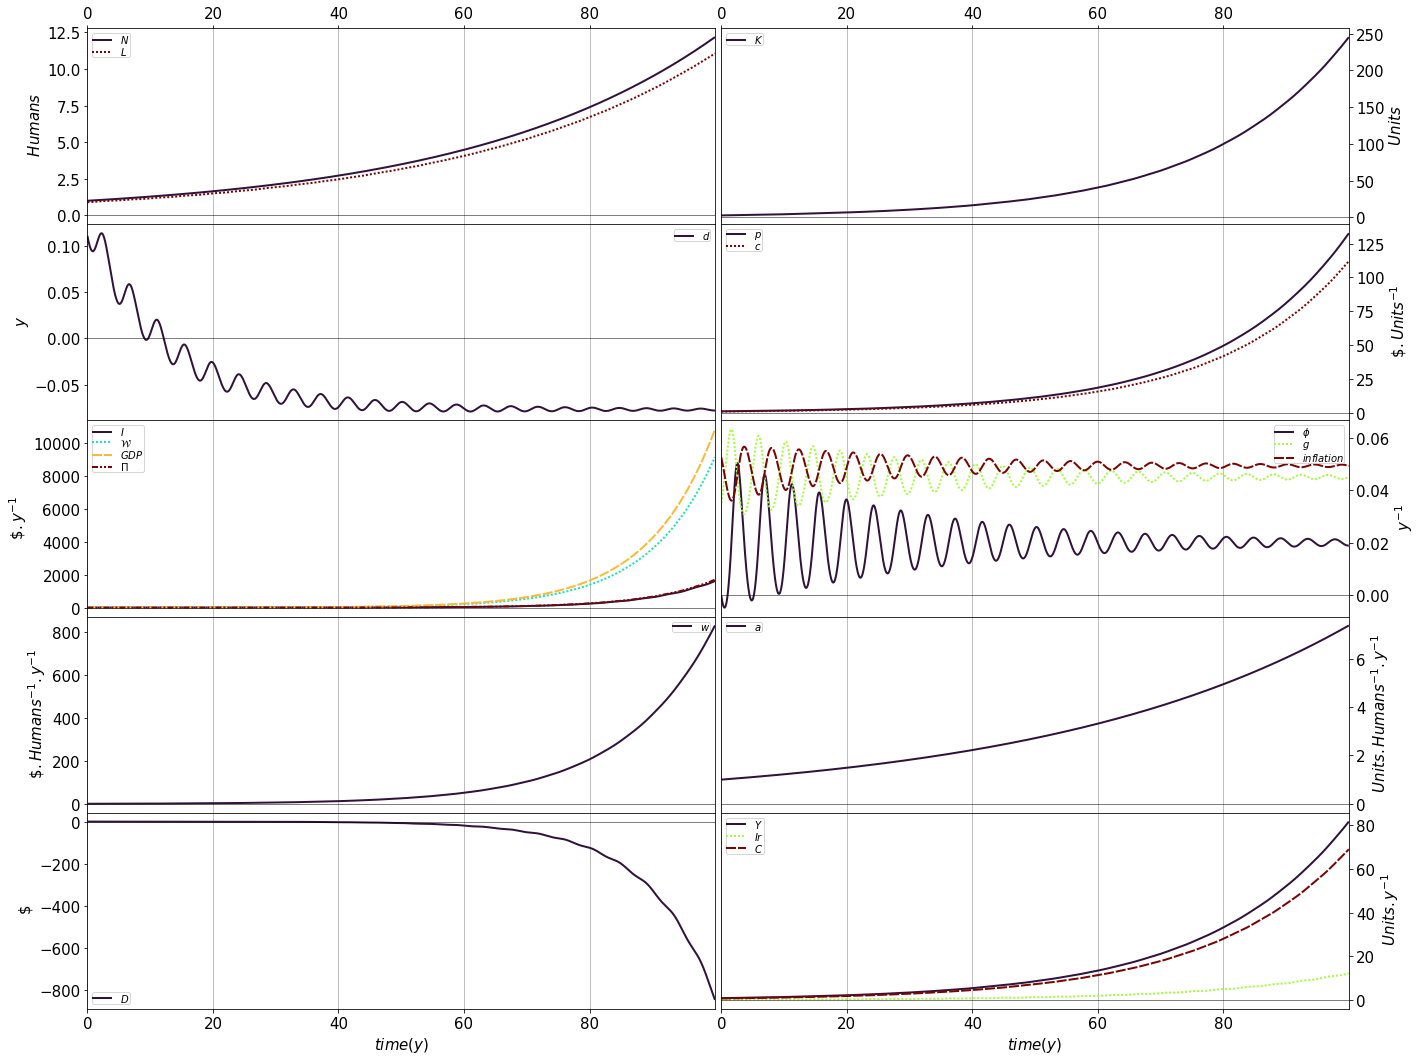

##################################################


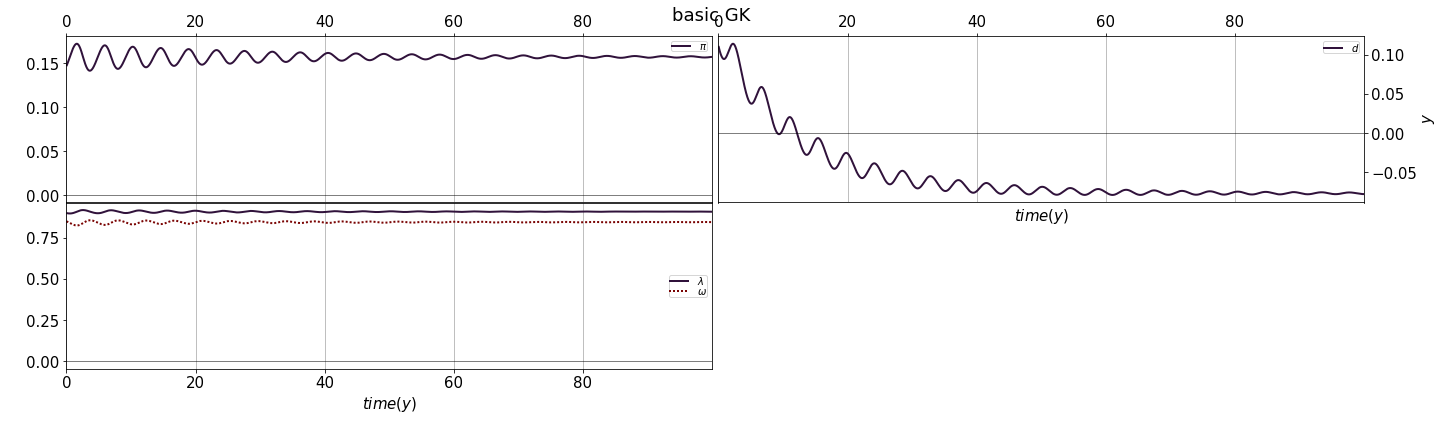

In [71]:
hub.plot(filters_units=['',]) ### Only the dimensionless units
print(50*'#')
hub.plot(filters_units=('',)) ### Everything but the dimensionless units
print(50*'#')
hub.plot(filters_units=['','y'],
         filters_key=('kappa'),
         separate_variables={'':['employment','omega']},
         title='basic GK') ### Everything but the dimensionless units

### GET ACCESS TO DATA 
All data are in dparam of hub, as a dictionnary of (dictionnary of (dictionnary))
It could be transformed someday in pandas, if someone wants to do it (I have other things to do but that could be nice)

First layer : field name, 
second layer : field properties 

Same system of filters exist for `hub.get_dparam` with list and tuples

In [72]:
help(hub.get_dparam)

Help on method get_dparam in module pygemmes._core:

get_dparam(condition=None, returnas=<class 'dict'>, verb=False, **kwdargs) method of pygemmes._core.Hub instance
    Return a copy of the input parameters dict that you can filter
    lcrit = ['key', 'dimension', 'units', 'type', 'group', 'eqtype','isneeded']



In [73]:
R=hub.get_dparam()
R1 = hub.get_dparam(key=['employment', 'omega'])
R2 = hub.get_dparam(key=('employment', 'omega'))
print(R.keys(),'\n',R1.keys(),'\n',R2.keys())

dict_keys(['a', 'N', 'K', 'w', 'D', 'p', 'Y', 'L', 'phillips', 'I', 'Ir', 'C', 'W', 'pi', 'employment', 'omega', 'GDP', 'c', 'Pi', 'g', 'kappa', 'inflation', 'd', 'Tmax', 'Tini', 'dt', 'nx', 'nr', '__ONE__', 'time', 'nt', 'alpha', 'n', 'delta', 'gammai', 'nu', 'r', 'k0', 'k1', 'k2', 'mu', 'eta', 'phinull', 'phi0', 'phi1']) 
 dict_keys(['employment', 'omega']) 
 dict_keys(['a', 'N', 'K', 'w', 'D', 'p', 'Y', 'L', 'phillips', 'I', 'Ir', 'C', 'W', 'pi', 'GDP', 'c', 'Pi', 'g', 'kappa', 'inflation', 'd', 'Tmax', 'Tini', 'dt', 'nx', 'nr', '__ONE__', 'time', 'nt', 'alpha', 'n', 'delta', 'gammai', 'nu', 'r', 'k0', 'k1', 'k2', 'mu', 'eta', 'phinull', 'phi0', 'phi1'])


In [27]:
R1['employment'].keys()

dict_keys(['func', 'com', 'eqtype', 'size', 'value', 'definition', 'units', 'symbol', 'group', 'multisect', 'inmodel', 'kargs', 'args', 'source_exp', 'isneeded'])

In [28]:
groupsoffields = hub.get_dparam_as_reverse_dict(
    crit='units',
    eqtype=['differential', 'statevar'])
for k,v in groupsoffields.items():
    print(k.ljust(25),list(v.keys()))
    
print('\n\n WITH PARAMETERS')
groupsoffields = hub.get_dparam_as_reverse_dict(
    crit='units',
    eqtype=['differential', 'statevar',None])
for k,v in groupsoffields.items():
    print(k.ljust(25),list(v.keys()))

                          ['pi', 'employment', 'omega', 'kappa']
Humans                    ['N', 'L']
Units                     ['K']
y                         ['d', 'time']
undefined                 []
$.Units^{-1}              ['p', 'c']
$.y^{-1}                  ['I', 'W', 'GDP', 'Pi']
y^{-1}                    ['phillips', 'g', 'inflation']
$.Humans^{-1}.y^{-1}      ['w']
Units.Humans^{-1}.y^{-1}  ['a']
$                         ['D']
Units.y^{-1}              ['Y', 'Ir', 'C']


 WITH PARAMETERS
                          ['pi', 'employment', 'omega', 'kappa', 'nx', 'nr', 'gammai', 'nu', 'k0', 'k1', 'k2', 'mu', 'phinull']
Humans                    ['N', 'L']
Units                     ['K']
y                         ['d', 'Tmax', 'Tini', 'dt', 'time']
undefined                 ['__ONE__']
$.Units^{-1}              ['p', 'c']
$.y^{-1}                  ['I', 'W', 'GDP', 'Pi']
y^{-1}                    ['phillips', 'g', 'inflation', 'alpha', 'n', 'delta', 'r', 'eta']
$.Humans^{-1}.y^{-1

#### Technical point : the data shape

`Pygemmes` core is made to take into account complex problem, the maximum level for the moment is : 
* multiple system in parrallel with different parameters (not interacting but simulated in parrallel) : it allows statistical treatment on a high number of run, stochasticity, sensibility....
* multiple regions with the same description, interacting differently
* fields to be a vector (N sectors who has a different price)
* fields to be a matrix (coupling between sectors for example)

`Pygemmes` is mostly based on a numpy implementation, dealing well with complex problem of dimensions. By default, all the fields will have values as a 5-dimensional tensor as follow : 
* **a** 'nt' number of timesteps (parameters do not have this one)
* **b** 'nx' number of parrallel system
* **c** 'nr' number of regions
* **d** number of sectors or `__ONE__`
* **e** number of sectors or `__ONE__` 

In consequence, if you want the field `field` value at time iteration **a**, on parrallel system **b**, on region **c**, between sector **d** and **e**, you want 
`R[field]['value'][a,b,c,d,e]`
If you have a monosectoral system with only one region, one parrallel system, and you want all the time values :
`R[field]['value'][:,0,0,0,0]`

(10000, 1, 1, 1, 1)


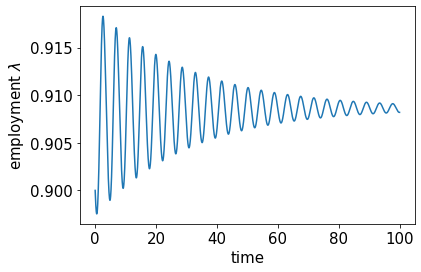

In [29]:
## Example : 
import matplotlib.pyplot as plt 
import numpy as np
R=hub.get_dparam(key=['employment','time'])
print(np.shape(R['employment']['value']))
x=R['time']['value'][:,0,0,0,0]
y=R['employment']['value'][:,0,0,0,0]
plt.plot(x,y)
plt.xlabel('time')
plt.ylabel('employment $\lambda$')
plt.show()

### Access to plots already existing 
A lot of plot can be accessed, here is a few samples 

In [30]:
plotlist = [f for f in dir(pgm.plots) if f[0]!= '_']
plotlist

['Var',
 'cycles_characteristics',
 'phasespace',
 'plot3D',
 'plot_timetraces',
 'plotbyunits',
 'plotnyaxis',
 'repartition']

Help on function Var in module pygemmes._plots._plots:

Var(hub, key, idx=0, Region=0, mode=False, log=False, title='')
    Just one variable plot, with possibly cycles analysis to be shown
    if you put [key,sectorname] it will load the specific sector
    if mode = 'sensitivity' the system will show statistical variance between parrallel run of nx
    if mode = 'cycles' the system will show cycles within the evolution of the variable with their characteristics



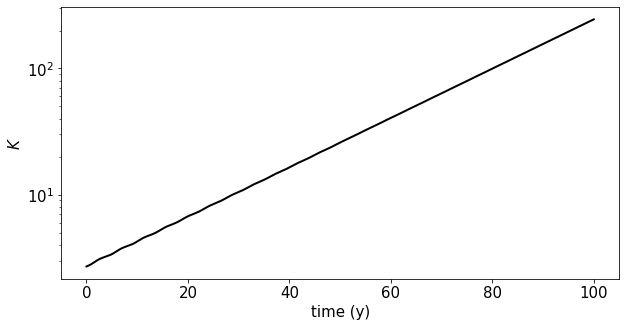

Calculation of cycles on each field as ref...
done


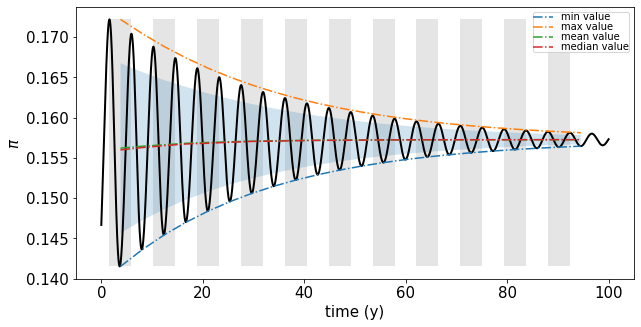

In [31]:
help(pgm.plots.Var)
pgm.plots.Var(hub,'K',log=True)
pgm.plots.Var(hub,'pi',mode='cycles') # We ask him for cycles information. He will activate a toolbox for you to get the data
# sensitivity will be shown later (section set_dparam)

Help on function phasespace in module pygemmes._plots._plots:

phasespace(hub, x, y, color='time', idx=0, Region=0)
    Plot of the trajectory of the system in a 2dimensional phase-space
    
    Parameters
    ----------
    sol : hub after a run
    x   : key for the variable on x axis, The default is 'omega'.
    y   : key for the variable on y axis, The default is 'employment'.
    idx : number of the system taken to be plot, The default is 0
    
    EXAMPLE :
    pgm.plots.phasespace(hub,'employment',['pi','Capital'],color=['omega','Consumption'])



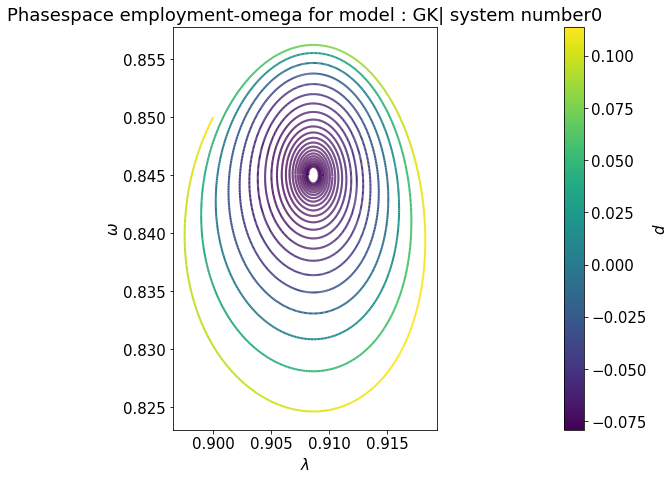

In [32]:
help(pgm.plots.phasespace)
pgm.plots.phasespace(hub,
                     x='employment',
                     y='omega',
                     color='d')

Help on function plot3D in module pygemmes._plots._plots:

plot3D(hub, x, y, z, color, cmap='jet', index=0, Region=0, title='')
    Plot a 3D curve, with a fourth information on the colour of the curve
    
    x,y,z,cinf are names of your variables
    cmap your colormap
    title is your graph title
    
    example, with two sectors 'Capital','Consumption'
    pgm.plots.plot3D(hub,'employment',
                         ['pi','Capital'],
                         ['rd','Capital'],
                         color=['omega','Consumption'])



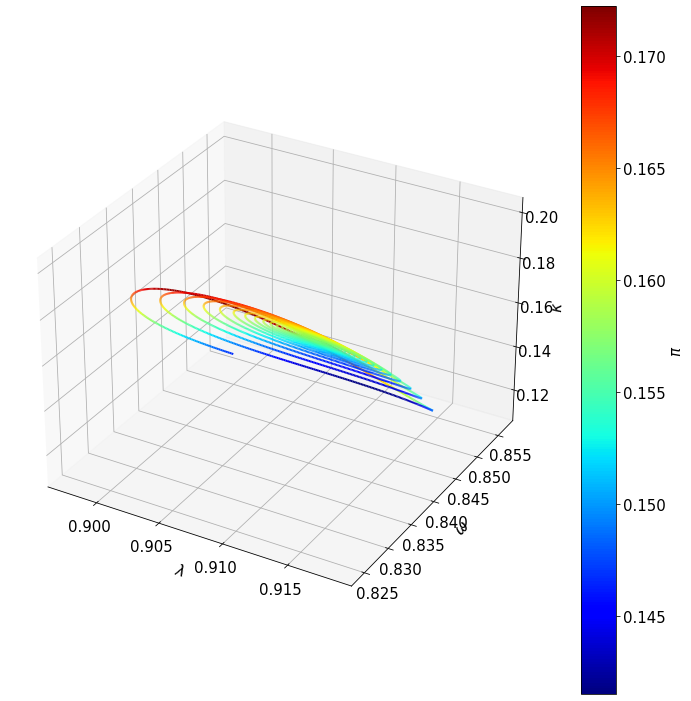

In [74]:
help(pgm.plots.plot3D)
pgm.plots.plot3D(hub, x='employment',
                 y='omega',
                 z='kappa',
                 color='pi',
                 cmap='jet',
                 index=0,
                 title='')

Help on function plotbyunits in module pygemmes._plots._plots:

plotbyunits(hub, filters_key=(), filters_units=(), filters_sector=(), separate_variables={}, lw=1, idx=0, Region=0, title='')
    generate one subfigure per set of units existing.
    
    There are three layers of filters, each of them has the same logic :
    if the filter is a tuple () it exclude the elements inside,
    if the filter is a list [] it includes the elements inside.
    
    Filters are the following :
    filters_units      : select the units you want
    filters_sector     : select the sector you want  ( '' is all monosetorial variables)
    filters_sector     : you can put sector names if you want them or not. '' corespond to all monosectoral variables
    separate_variables : key is a unit (y , y^{-1}... and value are keys from that units that will be shown on another graph,
    
    Region             : is, if there a multiple regions, the one you want to plot
    idx                : is the same for 

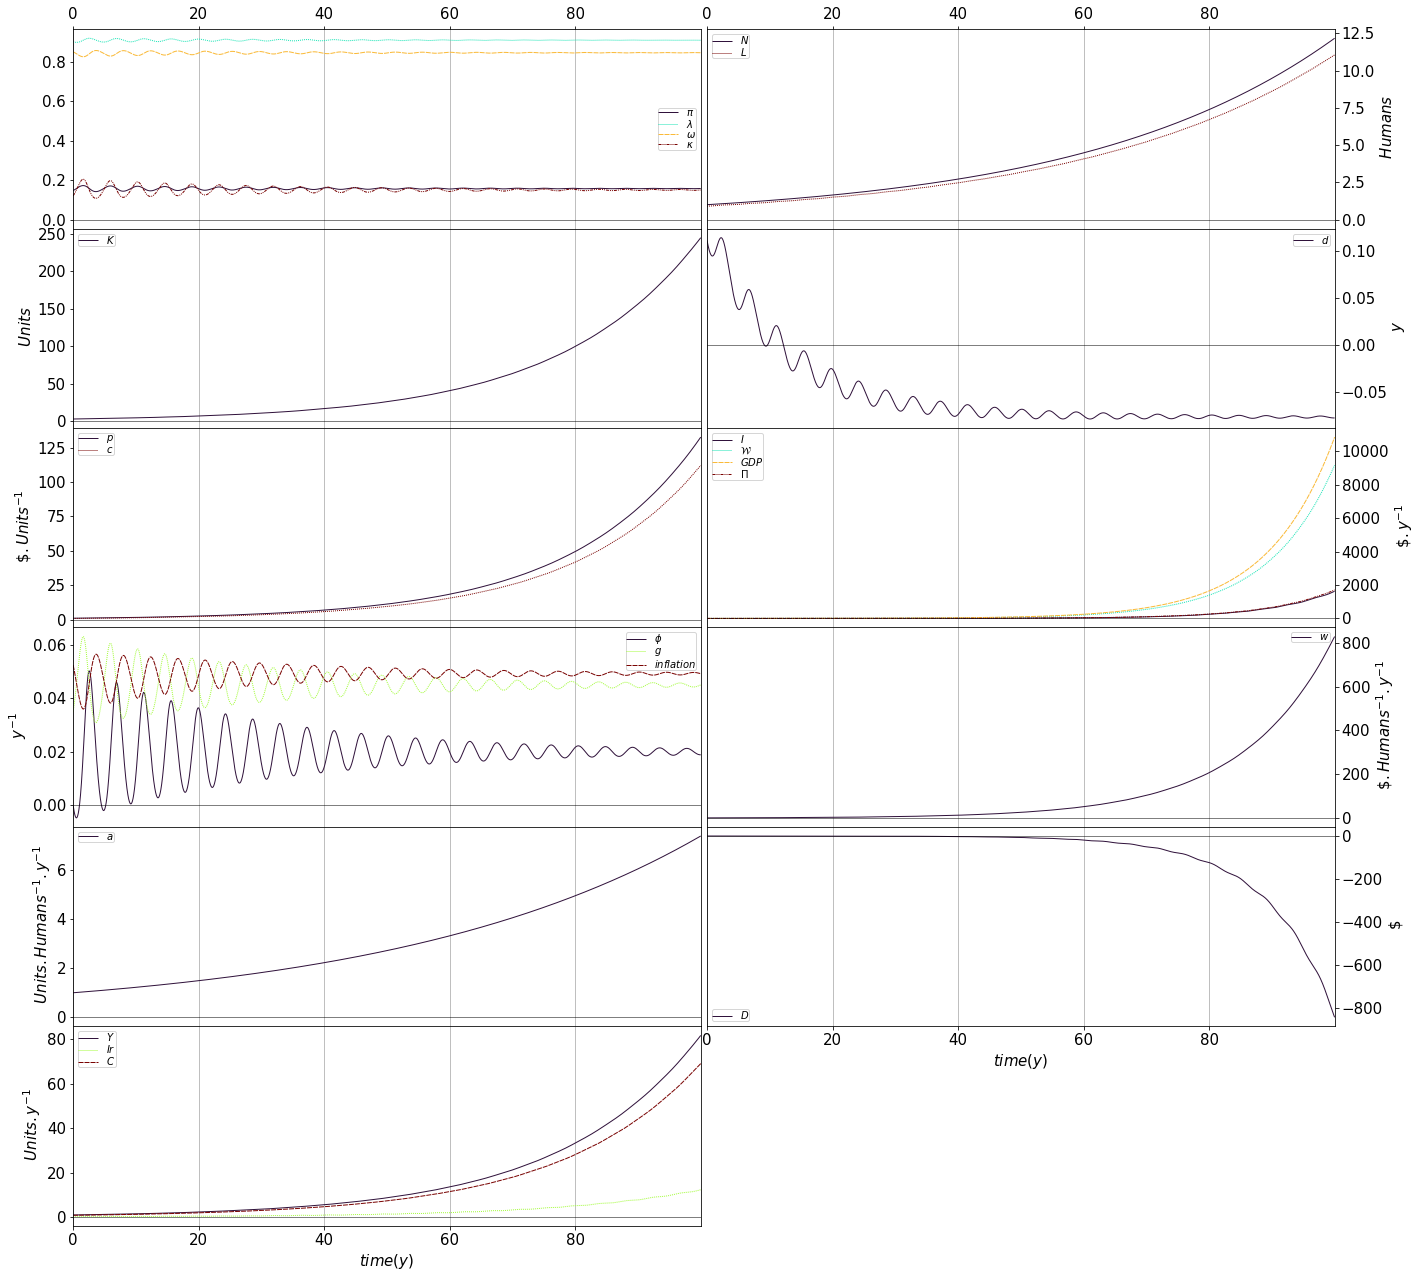

In [34]:
help(pgm.plots.plotbyunits)
pgm.plots.plotbyunits(hub) # same as hub.plot()


Help on function cycles_characteristics in module pygemmes._plots._plots:

cycles_characteristics(hub, xaxis='omega', yaxis='employment', ref='employment', type1='frequency', normalize=False, Region=0, title='')
     Plot frequency and harmonicity for each cycle found in the system
    
     xaxis='omega',
     yaxis='employment',
     ref='employment',
    type1 and type2 should be in 't_mean_cycle':
                                 'period_T':,
                                 'medval': ,
                                 'stdval':,
                                 'minval':,
                                 'maxval':  ,
                                 'frequency':,
                                 'Coeffs':
                                 'Harmonicity': }



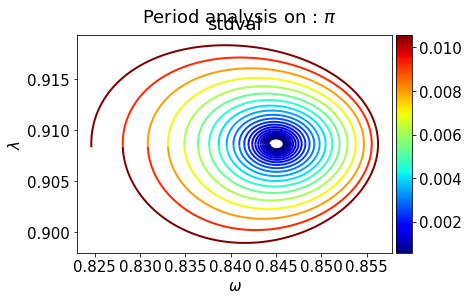

In [35]:
help(pgm.plots.cycles_characteristics)
pgm.plots.cycles_characteristics(hub,'omega','employment',ref='pi',type1='stdval')

Help on function plotnyaxis in module pygemmes._plots._plots:

plotnyaxis(hub, y=[[]], x='time', idx=0, Region=0, log=False, title='', lw=2)
    x must be a variable name (x axis organisation)
    y must be a list of list of variables names (each list is a shared axis)
    
    example :
        pgm.plots.plotnyaxis(hub, x='time',
                     y=[['employment', 'omega'],
                        ['pi'],
                        ],
                     idx=0,
                     title='',
                     lw=2)



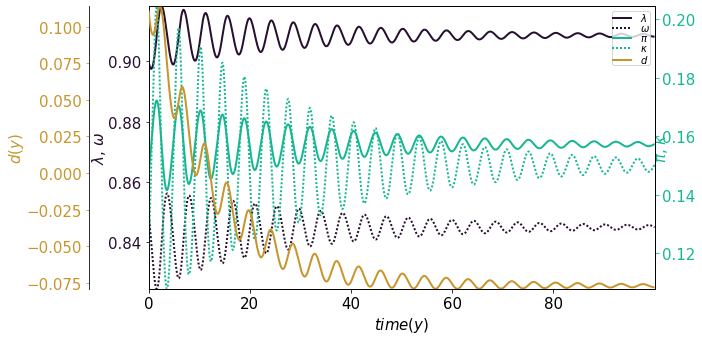

In [36]:
help(pgm.plots.plotnyaxis)
pgm.plots.plotnyaxis(hub, x='time',
             y=[['employment', 'omega'],
                ['pi','kappa'],
                ['d'],
                ],
             idx=0,
             title='',
             lw=2)

Help on function repartition in module pygemmes._plots._plots:

repartition(hub, keys: list, sector='', sign='+', ref='', refsign='+', title='', idx=0, region=0)
    Will create a substack of the different component you put in.
    
    Example on a multisectoral :
    repartition(hub,['pi','rd','xi','gamma','omega'],sector='Consumption')
    repartition(hub,['pi','rd','xi','gamma','omega'],sector='Capital')



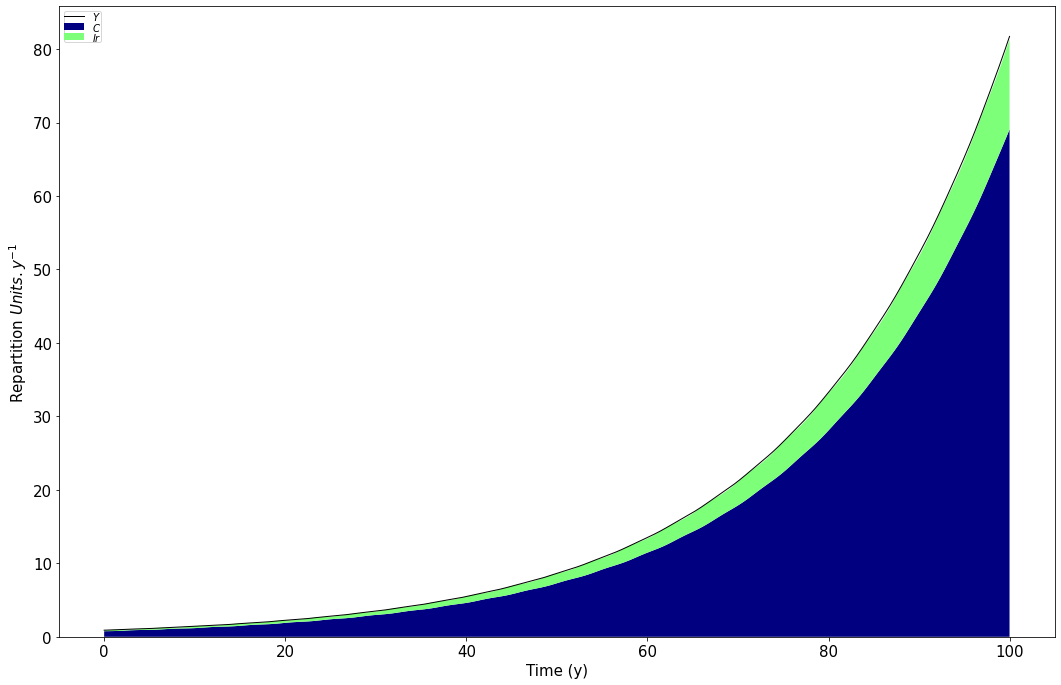

In [37]:
### THis is boring on a "too simple" model, but will be great on some more advanced stuff
help(pgm.plots.repartition)
pgm.plots.repartition(hub,['C','Ir'],ref='Y',sector='')

### Presets ! 

If the modeller is a nice guy, he created some preset to show some of the model special cases. They contains : 
* specific set of parameters and initial conditions
* plots to put the properties under the spotlight


In [38]:
pgm.get_available_models()
pgm.get_available_models('GK',details=True)

The following models are available from 'C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models'

 FOLDER                   | MODEL NAME           | Presets
############################################################
                          | TUTORIAL             | ['presetname1']
 Components               | Climate_3Layers      | ['default']
 Core                     | CHIMES               | ['GoodwinPURE', 'Bi-sectoral']
 Core                     | Goodwin              | ['default', 'many-orbits']
 Core                     | GoodwinFull          | ['default', 'many-orbits']
 Extended                 | GK                   | ['default', 'farfromEQ', 'crisis']
 Extended                 | Goodwin-PiInPhi      | ['zpi']
 Extended                 | Goodwin_CES          | ['CES']
 GEMMES                   | GEMMES_Coping2018    | ['BAU', 'BAU_DAM', 'TRANSITION']
 Miscellaneous            | stochastic           | ['Onevar', '10']
 Miscellaneous\Agents     | Agents               | ['default'

There are multiple way to load a preset from the start : 
* hub=pgm.Hub('GK',preset=presetname)
* hub=pgm.Hub('GK');hub.set_preset(presetname)

The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'gammai', 'nu', 'r', 'k0', 'k1', 'k2', 'mu', 'eta', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['C', 'W', 'omega', 'g', 'd']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'inflation', 'd', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g']
	- differential: ['a', 'N', 'K', 'w', 'D', 'p', 'time']
time step 2472 / 9090
time step 4891 / 9090
time step 7272 / 9090
time step 9090 / 9090
WARNING, PLOT `plot_timetraces` DEPRECIATED. SKIPPED FOR MATPLOTLIB ISSUES


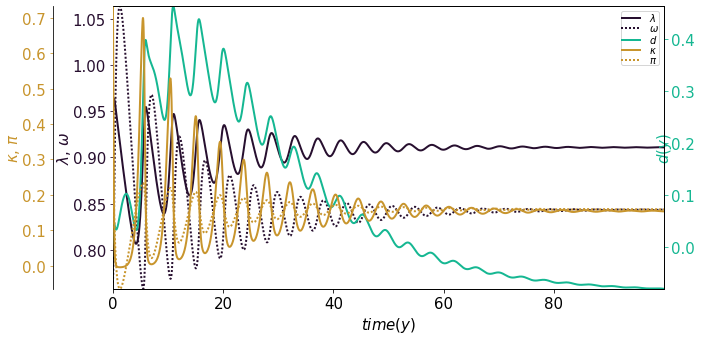

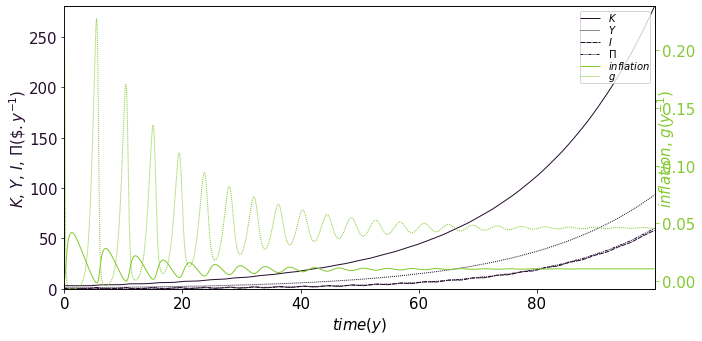

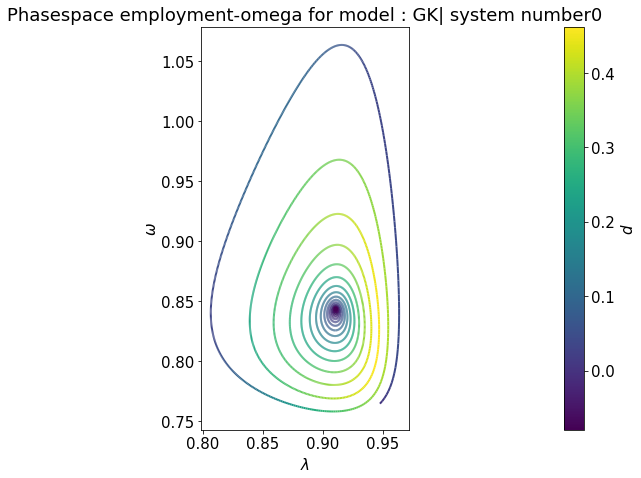

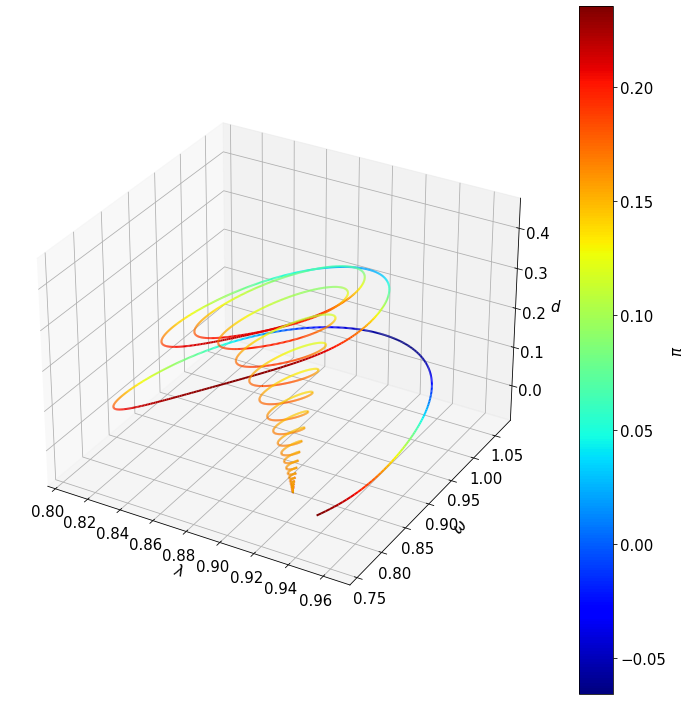

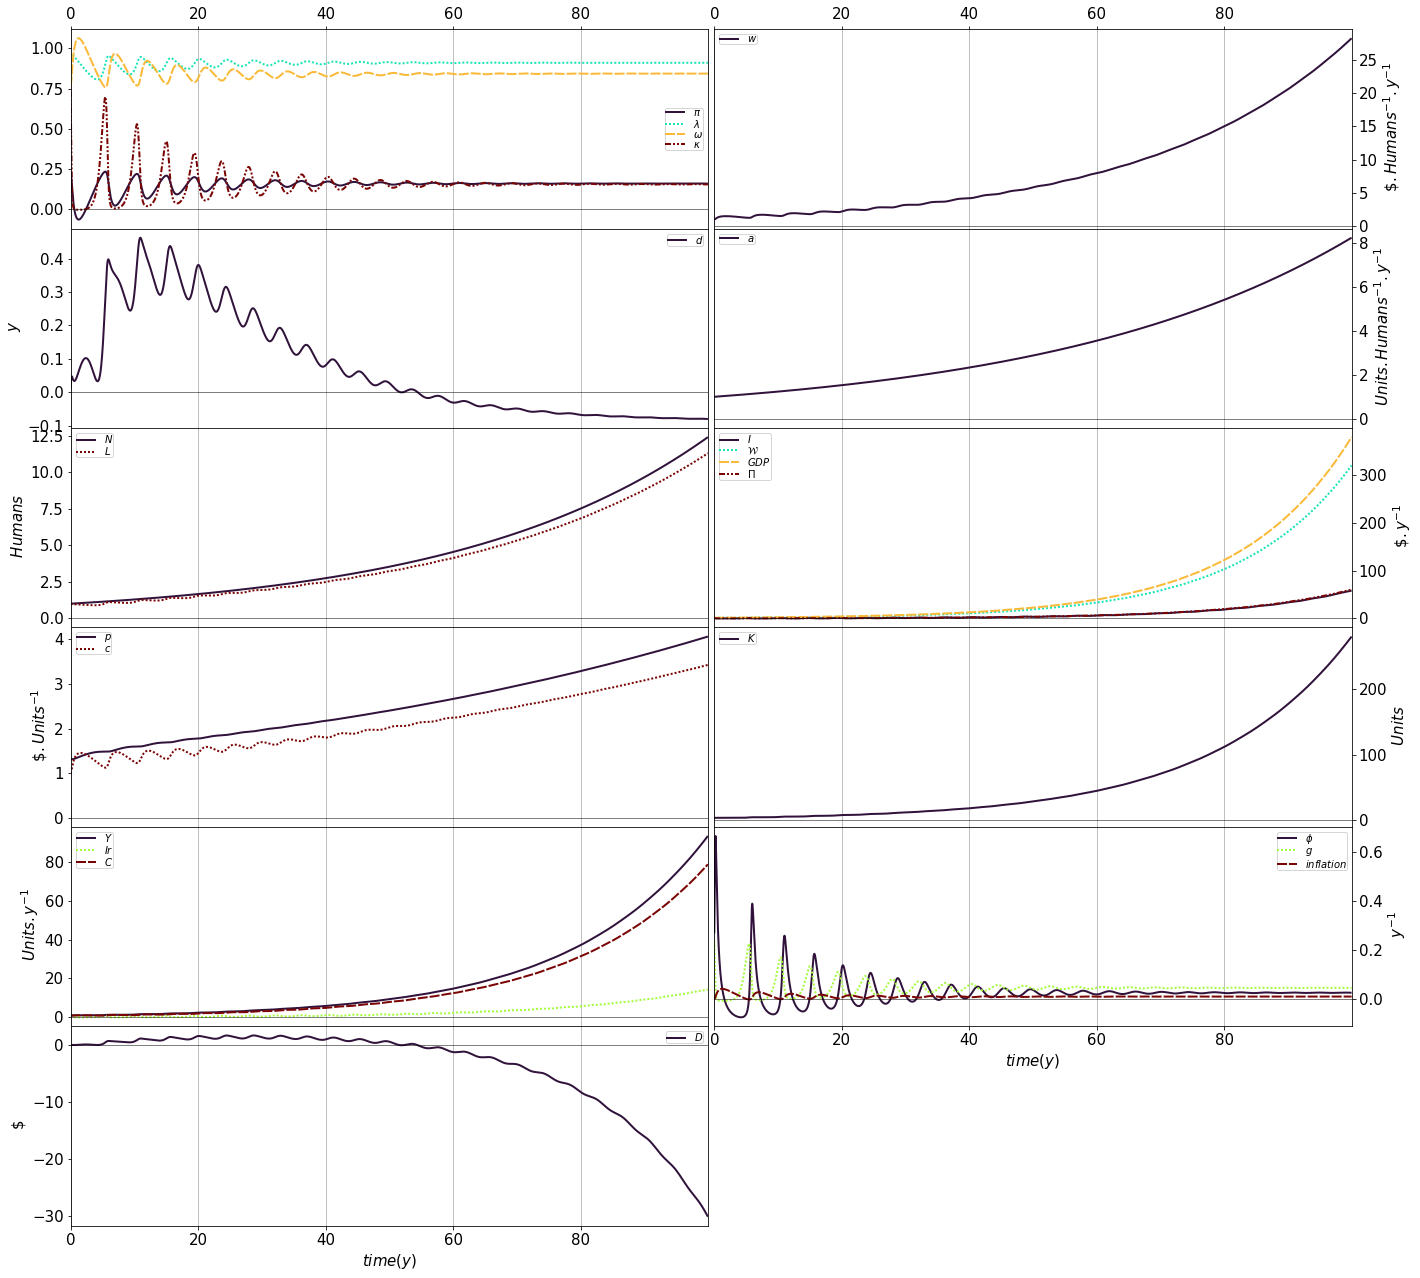

In [9]:
hub=pgm.Hub('GK',preset='default')
hub.run()
hub.plot_preset()

The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'gammai', 'nu', 'r', 'k0', 'k1', 'k2', 'mu', 'eta', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['C', 'W', 'omega', 'g', 'd']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'inflation', 'd', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g']
	- differential: ['a', 'N', 'K', 'w', 'D', 'p', 'time']
dt asked to be changed but the value 0.01 is already the one in the system

### Identified keys to be changed ###
   Dimensions : []
   Fields : ['a', 'N', 'D', 'K', 'w', 'alpha', 'n', 'nu', 'delta', 'k0', 'k1', 'k2', 'r', 'p', 'eta', 'gammai']
   Ignored :['dt']
Identified N as a value change on all ax

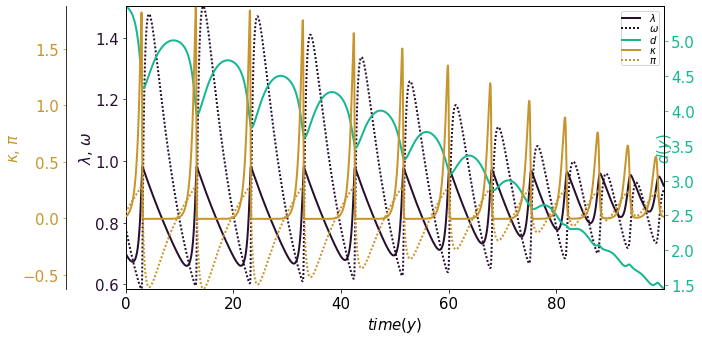

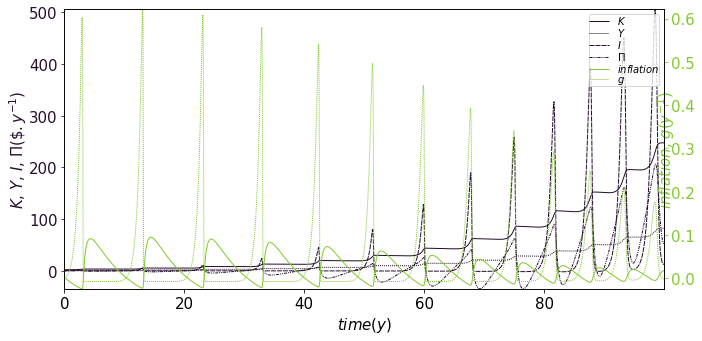

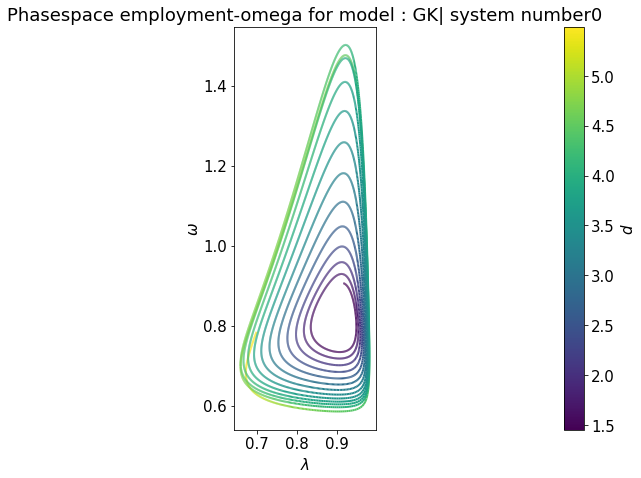

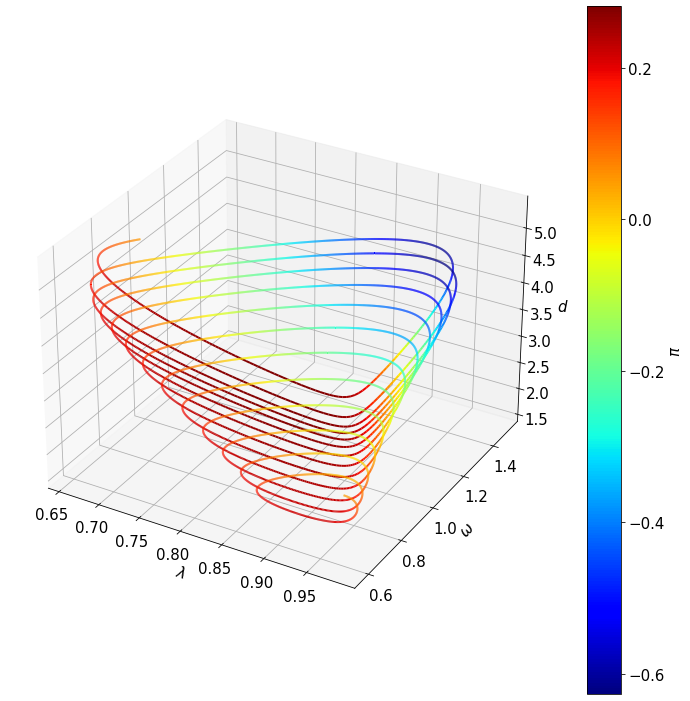

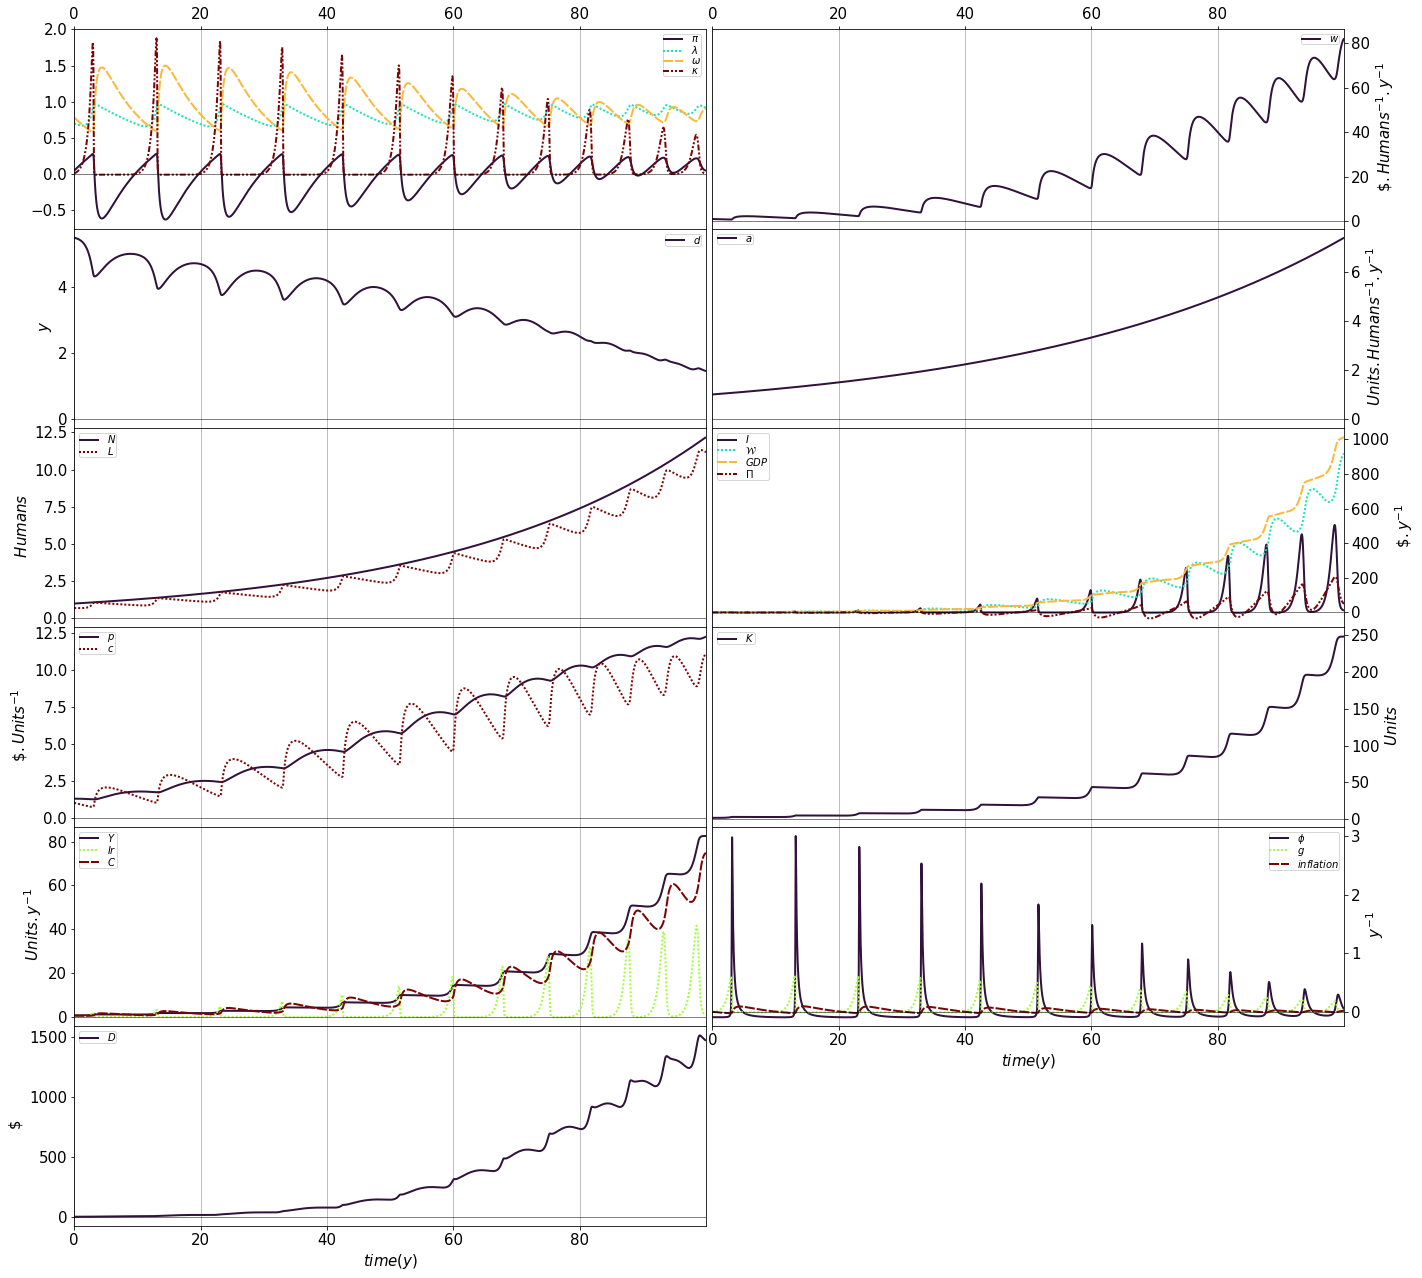

In [10]:
hub=pgm.Hub('GK')
hub.set_preset('farfromEQ')
hub.run()
hub.plot_preset()

### THE INFAMOUS SET_DPARAM

Behold ! 
This is the magic function which allow you to change any initial value or parameter, either socio-physical or purely numerical

In [41]:
help(hub.set_dparam)

Help on method set_dparam in module pygemmes._core:

set_dparam(key=None, value=None, verb=True, **kwargs) method of pygemmes._core.Hub instance
    Your best friend to change the fields values or sizes in the system.
    It can change :
        * dimensions ( duration of the simulated tine 'Tmax',
                       duration of one timestep 'dt'
                       number of system in parrallel 'nx',
                       number of regions             'nr',
                       number of sectors in a multisector object _nameofthedimension...
                       )
        * values of parameters and initial conditions, either for all systems/regions/sector, either indexwise
    
    if you want to change only one field, you can do "set_dparam(key,values)"
    if you want to change multiple fields at once you can do "set_dparam(**dict)" with dict={key:values},
    the way to put multiple values or specific sector will be explained in 2)
    
    1) ### CHANGE DIMENSIONS ####

In [11]:
# changing one value 
hub=pgm.Hub('GK',verb=False)
hub.set_dparam('alpha',0)
hub.get_summary()


### Identified keys to be changed ###
   Dimensions : []
   Fields : ['alpha']
   Ignored :[]
Identified alpha as a value change on all axes
############################################################
####################      SUMMARY       ####################
############################################################
Model       : GK

DESCRIPTION : This is a Goodwin model with possibility to get loans at the bank, and have a price dynamics.
              As described by keen + inflation

TYPICAL BEHAVIOR : Convergence toward solow point ( good equilibrium) or debt crisis
LINKTOARTICLE:

@author: Paul Valcke

File        : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Extended\_model_GK.py
####################       Fields       ####################
statevar        017 ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'inflation', 'd', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g']
differential    007 ['a', 'N', 'K', 'w', 'D', 'p', 'time']
parameters      020 ['alpha

[0.   0.05 0.1 ]

### Identified keys to be changed ###
   Dimensions : ['nx']
   Fields : ['alpha']
   Ignored :[]
time step 1985 / 10000
time step 3607 / 10000
time step 5144 / 10000
time step 6981 / 10000
time step 8961 / 10000
time step 10000 / 10000
the system is calculating statsensitivity...
done


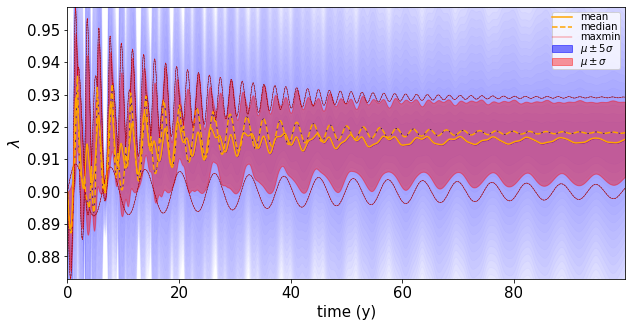

In [81]:
# PUTTING 10 VALUES 
import numpy as np
print(np.linspace(0,0.1,3))
hub=pgm.Hub('GK',verb=False)
hub.set_dparam(**{
    'nx':3,
    'alpha':np.linspace(0,0.1,3),})
hub.run()
pgm.plots.Var(hub,'employment',mode='sensitivity')

In [83]:
# Putting values taken randomly in a distribution 
'''
SensitivityDic = {
    'alpha': {'mu': .02,
              'sigma': .12,
              'type': 'log'},
    'k2': {'mu': 20,
           'sigma': .12,
           'type': 'log'},
    'mu': {'mu': 1.3,
           'sigma': .12,
           'type': 'log'},
}
presetSimple = pgm.generate_dic_distribution(
    {'alpha': {'mu': 0.02,
               'sigma': .2,
               'type': 'log'}, }, N=100)
presetCoupled = pgm.generate_dic_distribution(SensitivityDic,
                                              N=100)
presetCoupled['nx']=100

hub=pgm.Hub('GK',verb=False)
hub.set_dparam(**presetCoupled)
hub.run(N=100)
hub.calculate_StatSensitivity()
pgm.plots.Var(hub,'employment',mode='sensitivity')
'''
help(pgm.generate_dic_distribution)

Help on function generate_dic_distribution in module pygemmes._toolbox:

generate_dic_distribution(InputDic, dictpreset={}, N=10)
    Wrapup around GenerateIndividualSensitivity function, to generate multiple distributions entangled.
    
    InputDic should look like :
        {
        'alpha': {'mu': .02,
                  'sigma': .2,
                  'type': 'normal'},
        'k2': {'mu': 20,
               'sigma': .2,
               'type': 'log'},
        'mu': {'mu': 1.3,
               'sigma': .2,
               'type': 'uniform'},
        }
    
    'type' can be :
        1. 'log','lognormal','log-normal' for lognormal distribution
        2. 'normal','gaussian' for gaussian distribution
        3. 'uniform' for uniform distribution in interval [mu,sigma]
    
    Be careful, grid will generate N**len(InputDic.key()) run if activated !
    
    GenerateIndividualSensitivity :
        Generate a preset taking random values in one distribution.
    
    INPUT :
        * m

## Convergence rate and valleys of stability 
to be done later !

## Multisectorality 

The new cool kid in town

In [13]:
pgm.get_available_models()
hub=pgm.Hub('CHIMES',preset='MonoSectoral')
hub.get_summary()
hub.run()

The following models are available from 'C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models'

 FOLDER                   | MODEL NAME              | Presets
###############################################################
                          | TUTORIAL                | ['presetname1']
 Components               | Climate_3Layers         | ['default']
 Core                     | Goodwin                 | ['default', 'many-orbits']
 Core                     | GoodwinFull             | ['default', 'many-orbits']
 ECHIMES                  | Accessibility           | ['3sectors']
 ECHIMES                  | CHIMES                  | ['MonoSectoral', 'Bisectoral', 'Trisectoral']
 ECHIMES                  | CHIMES0                 | ['Goodwin', 'Bisectoral']
 ECHIMES                  | ECHIMES                 | ['Goodwin', 'Bisectoral']
 ECHIMES                  | InternationalExchange   | ['3by2']
 ECHIMES                  | logisticConsumption     | []
 ECHIMES                  | Multis

name : Xi, units : 
      |  Mono
----  -  ----
Mono  |  1.00

name : rho, units : y^{-1}
      |  Mono
----  -  ----
Mono  |  0.01
time step 291 / 10000
time step 603 / 10000
time step 911 / 10000
time step 1252 / 10000
time step 1593 / 10000
time step 1926 / 10000
time step 2244 / 10000
time step 2592 / 10000
time step 2953 / 10000
time step 3313 / 10000
time step 3666 / 10000
time step 4031 / 10000
time step 4404 / 10000
time step 4729 / 10000
time step 5087 / 10000
time step 5469 / 10000
time step 5806 / 10000
time step 6146 / 10000
time step 6499 / 10000
time step 6879 / 10000
time step 7210 / 10000
time step 7564 / 10000
time step 7916 / 10000
time step 8234 / 10000
time step 8590 / 10000
time step 8940 / 10000
time step 9308 / 10000
time step 9650 / 10000
time step 10000 / 10000


In [14]:
def allplots_multisect(hub):
    R=hub.get_dparam()
    sectors = R['Nprod']['list']
    for sector in sectors :
        pgm.plots.plotnyaxis(hub, y=[[['inflation', sector],
                                      ['inflationMarkup', sector],
                                      ['inflationdotV', sector], ],
                                     [['c',sector],
                                      ['p',sector]],
                                     [['pi',sector],
                                      ['kappa',sector]],
                                     [['employmentlocal',sector],
                                      ['u',sector],
                                      ]],)
        pgm.plots.repartition(hub,
                              ['pi','omega','xi','gamma','rd','reloverinvest','reldotv'],
                              sector=sector,
                              title='Expected relative budget $\pi$ ')
        pgm.plots.repartition(hub,['TakenbyY','TakenbyI','C','dotV'],
                              ref='Y',
                              sector=sector,
                              title=f'Physical Fluxes for sector {sector}')
        pgm.plots.repartition(hub,['Wage','TransactInter','TransactI','Consumption','Interests'],
                              ref='dotD',
                              sector=sector,
                              title=f'Monetary Fluxes for sector {sector}')
    

In [16]:
hub=pgm.Hub('CHIMES',preset='Bisectoral')
hub.get_summary()
hub.run()


The following fields are defined in the model but not it the library :
	- statevar: ['inflationMarkup', 'inflationdotV', 'philips', 'checksumI', 'xi', 'PiInstant', 'piInstant', 'Iaccontability', 'TakenbyI', 'TakenbyY', 'pY', 'TransactI', 'TransactInter', 'Consumption', 'Interests', 'Wage', 'employmentlocal', 'growthK', 'reldotv', 'reloverinvest', 'Equity', 'EquityHousehold', 'pAGG', 'GDPnomY', 'GDPnom2', 'CAGG', 'IAGG', 'VAGG', 'KAGGpass', 'KAGGact', 'HAGG', 'LAGG', 'aAGG', 'DAGG', 'omegaAGG', 'uAGG', 'nuAGG', 'deltaAGG', 'deltahAGG', 'dAGG', 'rdAGG', 'gammaAGG', 'XiAGG', 'xiAGG', 'piAGG', 'cAGG']
The following fields are identified as parameters :
	- independant : ['k0']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['Omega', 'checksumI', 'Pi', 'PiInstant', 'piInstant', 'Iaccontability', 'TakenbyI', 'TakenbyY', 'pY', 'TransactI', 'TransactInter', 'Consumption', 'Interests', 'Wa

time step 200 / 200


In [17]:
hub.get_summary(removesector=('Consumption'))

############################################################
####################      SUMMARY       ####################
############################################################
Model       : CHIMES

Old Version

CORE for HOLISTIC INTERDISCIPLINARY MODEL assessing ECOLOGICAL SUSTAINABILITY

The goal of CHIMES is :
    * description of production with physical variables
    * behavior of agents (price, investment) based on economic values
    * Connexion to ecological systems through physical coupling (emissions, land use...)

It integrates :
    * N productive sector, by activity
    * Material flow analysis integrated inside
    * Loans dynamics for investment and cross-sector expanses
    * Inventory fluctuations
    * Inflation
    * Adaptive use of capital

WE ARE STILL ON A DUMMY CONSUMPTION THEORY
IF YOU WANT A LIGHT VERSION, OPEN THE MODEL FILE AND CHANGE __AUXIN and __AGGIN

More infos : https://www.overleaf.com/read/vywvyymcqwwk

CHIMES :

File        : C:\Users\Paul Valc

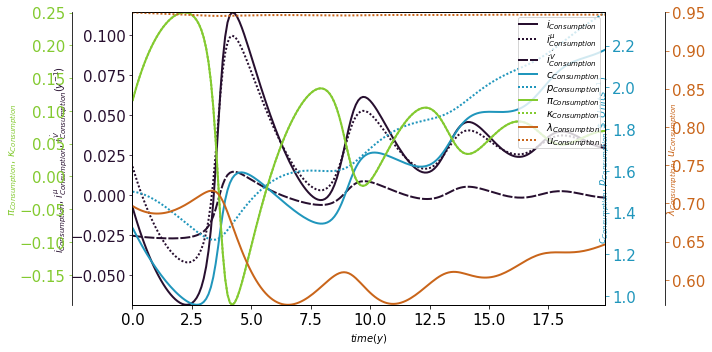

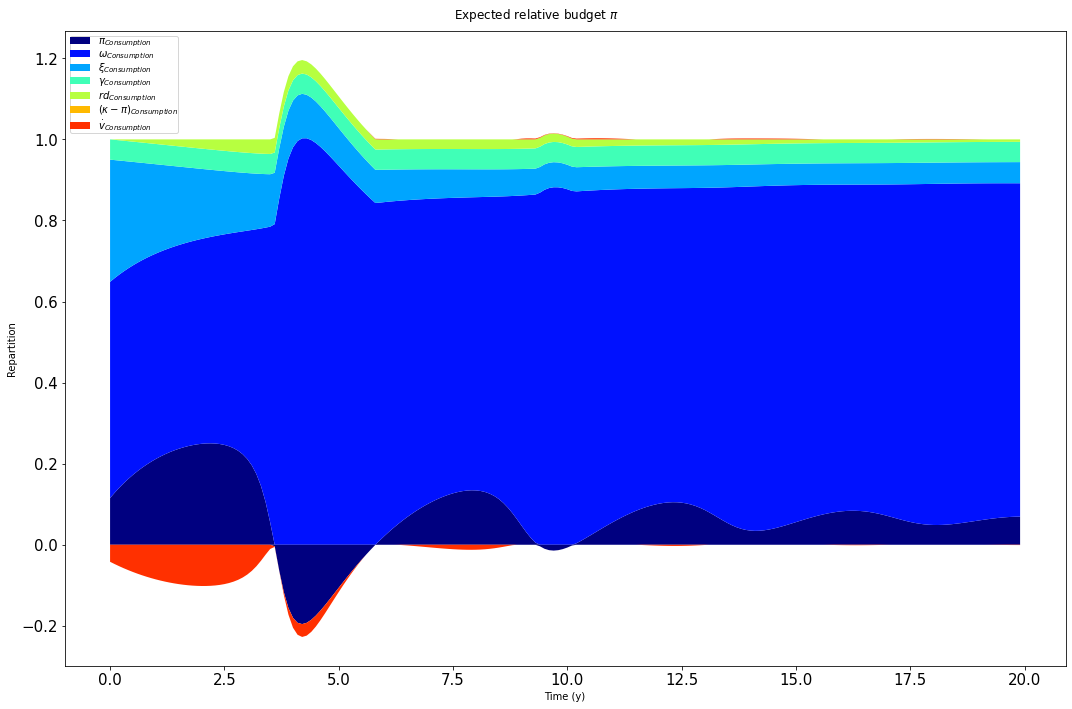

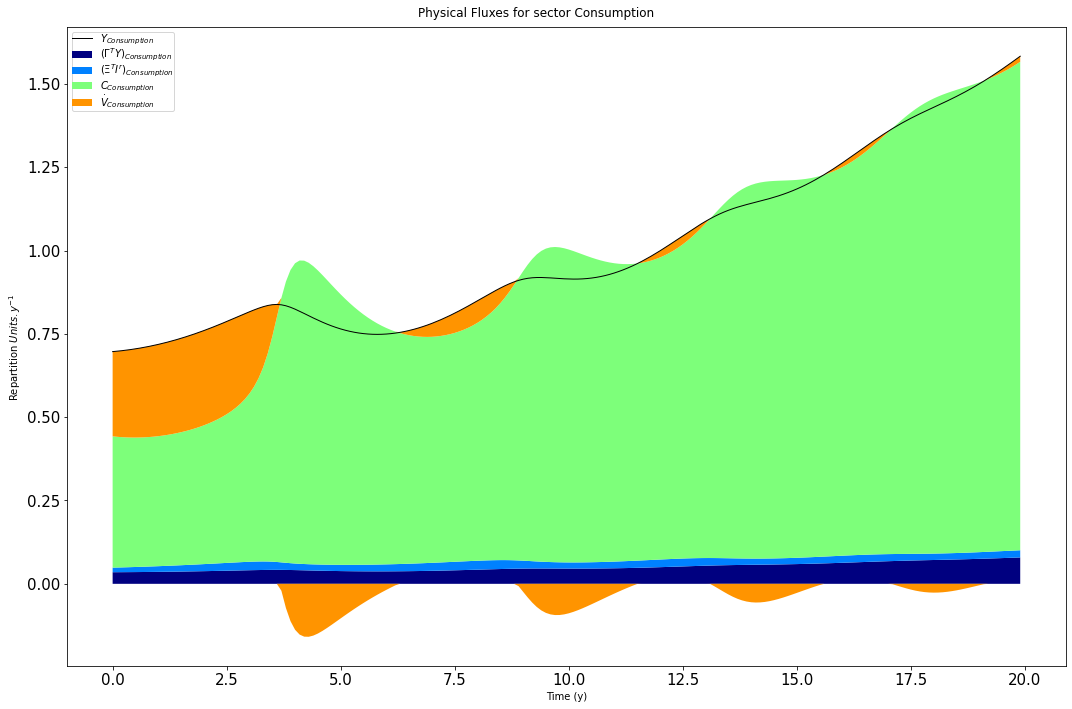

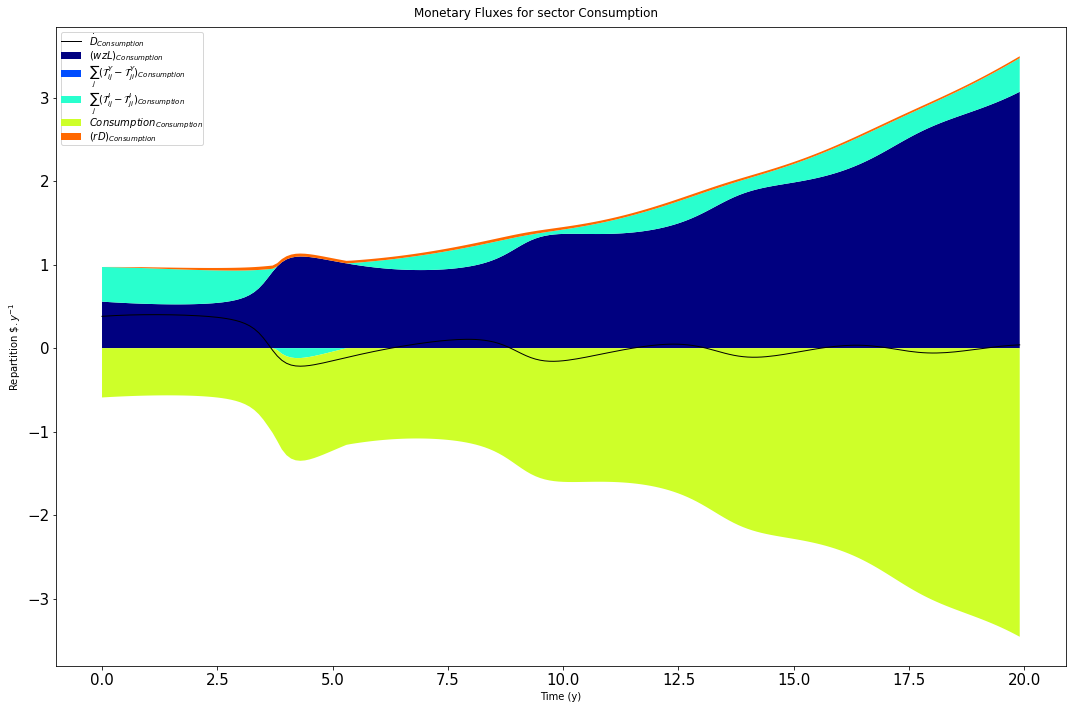

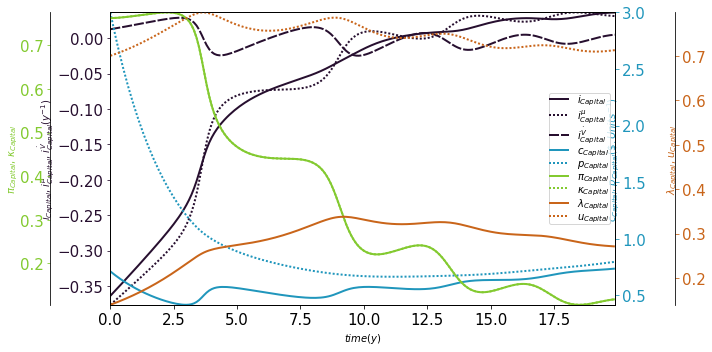

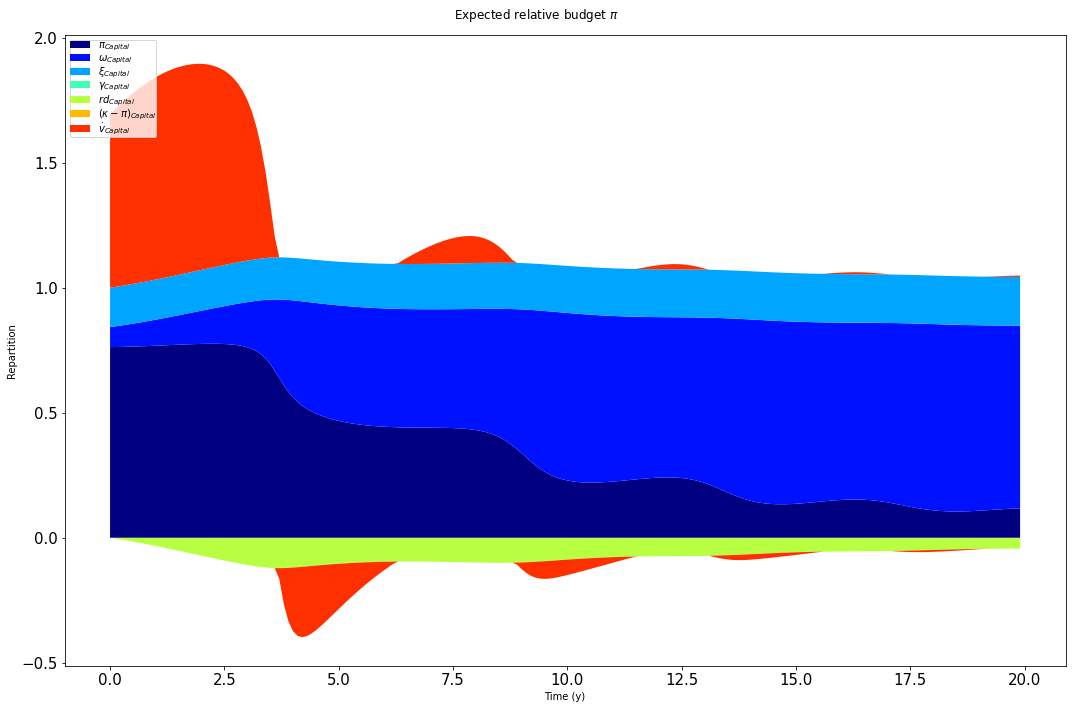

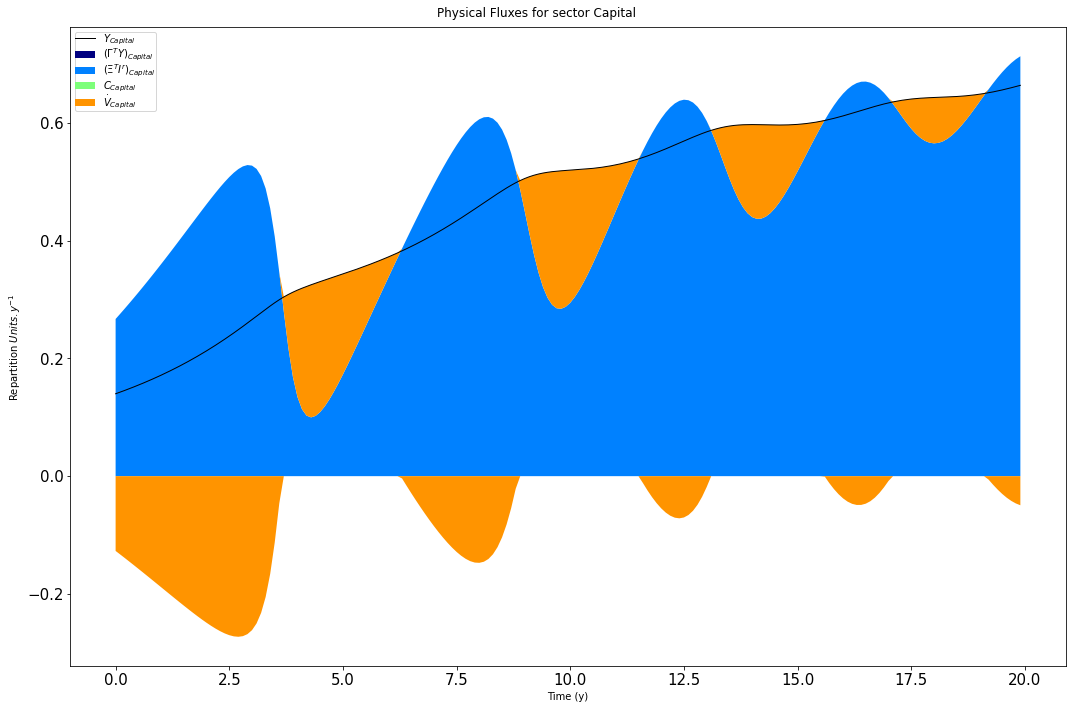

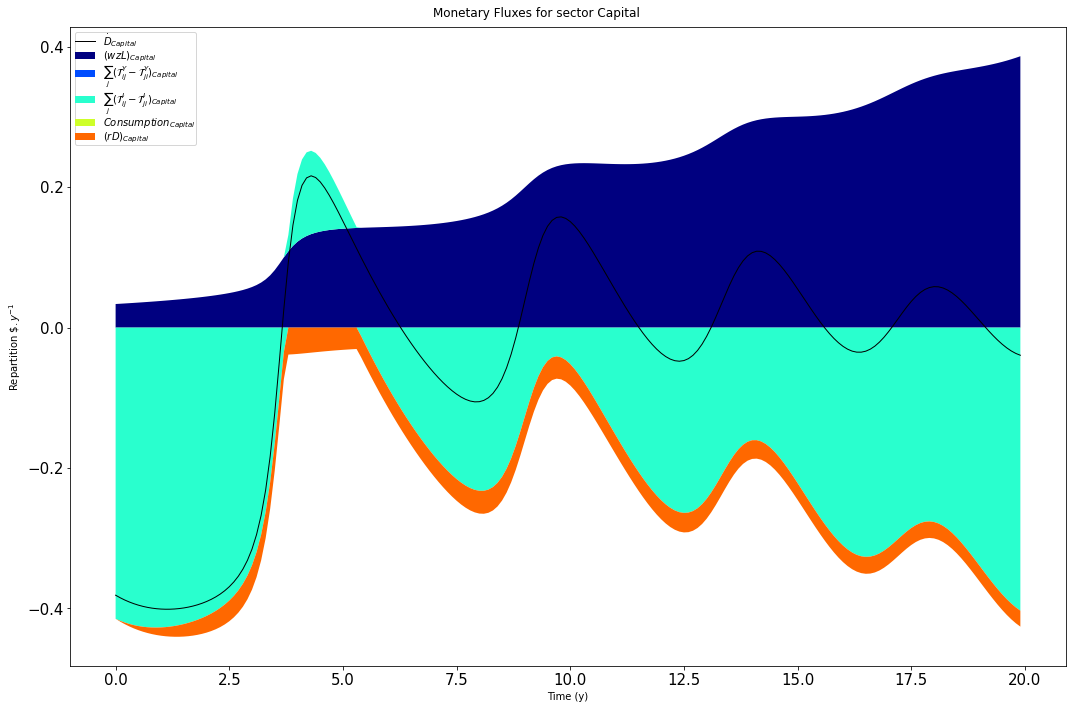

In [20]:
%matplotlib inline
allplots_multisect(hub)

## Inter-region interactions

We can solve 
    $dC/dt = -D \nabla \nabla C$
With the spatial dimension being taken by distances




The following fields are defined in the model but not it the library :
	- differential: ['C']
	- statevar: ['gradCx', 'lapC']
	- parameter: ['diffCoeff', 'nabla']
The following fields are identified as parameters :
	- independant : []
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['gradCx', 'lapC']
	- differential: ['C', 'time']
time step 1000 / 1000


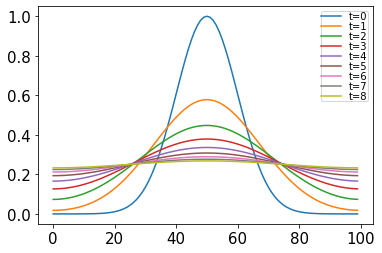

############# DIFFERENTIAL EQUATIONS ###########
###  C  ###########
Units        : undefined
Equation     : dC/dt= diffCoeff*lapC ,
definition   : Concentration
units        : undefined
Comment      : uniform diffcoeff
Dependencies :
     lapC      undefined  No definition
     diffCoeff  undefined  No definition
 
###  time  ###########
Units        : y
Equation     : dtime/dt= 1.,
definition   : Time vector
units        : y
Comment      : dt/dt=1, time as ODE
Dependencies :
     dt        y         solver timestep
 
######### STATE VARIABLES EQUATIONS ###########
###  gradCx  ###########
Units        : undefined
Equation     : gradCx= Rmatmul(C,nabla),
definition   : 1d gradient of C
Comment      : calculated with nabla matrix multiplication
Dependencies :
     C         undefined  Concentration
     nabla     undefined  spatial operator
 
 
###  lapC  ###########
Units        : undefined
Equation     : lapC= Rmatmul(gradCx,nabla),
definition   : No definition
Comment      : No comm

In [51]:
pgm.get_available_models('Diffusion',details=True)
hub=pgm.Hub('PDE-Diffusion',preset='Basic')
hub.run()
R=hub.get_dparam()
C=R['C']['value'][:,0,:,0,0]
for i in range(9):
    plt.plot(C[100*i,:],label=f't={i}')
plt.legend()
plt.show()

hub.get_equations_description()

### RUN PERTURBATION

We run the system, then we take the final state of the system as the initial condition of a new one. We shift the value, and we see how it respond.

The following fields are defined in the model but not it the library :
	- statevar: ['C', 'W']
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'gammai', 'nu', 'r', 'k0', 'k1', 'k2', 'mu', 'eta', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['C', 'W', 'omega', 'g', 'd']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'inflation', 'd', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g']
	- differential: ['a', 'N', 'K', 'w', 'D', 'p', 'time']

### Identified keys to be changed ###
   Dimensions : ['dt']
   Fields : []
   Ignored :[]
time step 1000 / 1000


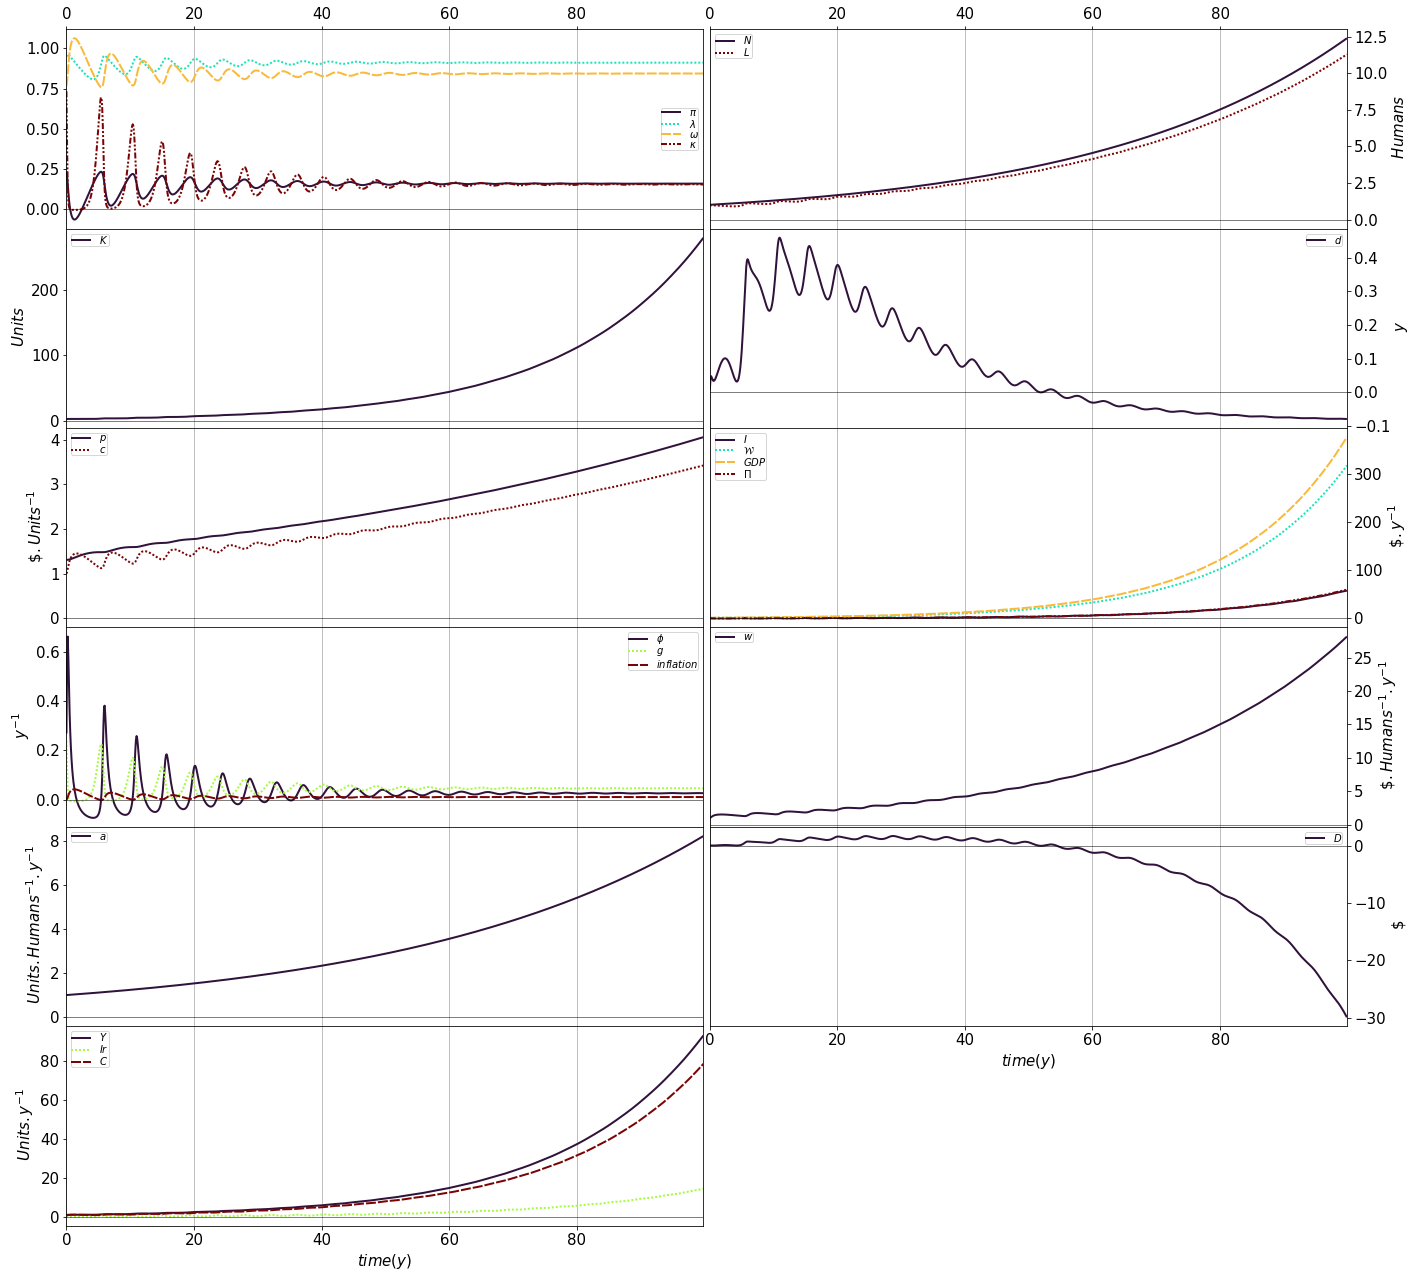

a [[[[8.23052934]]]]
N [[[[12.39682425]]]]
K [[[[279.76164319]]]]
w [[[[28.14949622]]]]
D [[[[-29.94127034]]]]
p [[[[4.05340964]]]]
Tmax 100
Tini 0
dt 0.1
nx 1
nr 1
alpha [[[[0.021]]]]
n [[[[0.0251]]]]
delta [[[[0.0051]]]]
gammai [[[[0.51]]]]
nu [[[[3.01]]]]
r [[[[0.031]]]]
k0 [[[[-0.00651]]]]
k1 [[[[0.0066709]]]]
k2 [[[[20.01]]]]
mu [[[[1.3]]]]
eta [[[[0.11]]]]
phinull [[[[0.1]]]]


In [90]:
### FIRST RUN
hub=pgm.Hub('GK',preset='default')
hub.set_dparam('dt',0.1)
hub.run()
hub.plot()

### WE EXTRACT THE NEW STATE OF THE SYSTEM 
newpreset=hub.Extract_preset()
for k,v in newpreset.items():print(k,v)
### WE PUT IT IN A NEW HUB ( TO KEEP PREVIOUS VALUES )
#hubnext=pgm.Hub('GK')
#hubnext.set_dparam(**newpreset)
#hubnext.set_dparam('K',200)
#hubnext.run()
#hubnext.plot()



In [92]:
help(hub.Extract_preset)
hub.Extract_preset(t=50)

Help on method Extract_preset in module pygemmes._core:

Extract_preset(t=-1) method of pygemmes._core.Hub instance
    Create a dictionnary, containing all fields value at the instant t.
    by default take the value at the latest instant
    you can save it and put it with set_dparam in a new run !



{'a': array([[[[2.88017291]]]]),
 'N': array([[[[3.53403519]]]]),
 'K': array([[[[28.03210638]]]]),
 'w': array([[[[5.82461789]]]]),
 'D': array([[[[0.63924493]]]]),
 'p': array([[[[2.39709592]]]]),
 'Tmax': 100,
 'Tini': 0,
 'dt': 0.1,
 'nx': 1,
 'nr': 1,
 'alpha': array([[[[0.021]]]]),
 'n': array([[[[0.0251]]]]),
 'delta': array([[[[0.0051]]]]),
 'gammai': array([[[[0.51]]]]),
 'nu': array([[[[3.01]]]]),
 'r': array([[[[0.031]]]]),
 'k0': array([[[[-0.00651]]]]),
 'k1': array([[[[0.0066709]]]]),
 'k2': array([[[[20.01]]]]),
 'mu': array([[[[1.3]]]]),
 'eta': array([[[[0.11]]]]),
 'phinull': array([[[[0.1]]]])}

# Your turn ! 

## Running the system on your own
1. Reset your terminal
2. Load pygemmes 
3. Load a model (GoodwinFull) 
4. Look at the summary 
5. Change one parameter (for example, the interest rate)
6. Do a run 
7. Do a plot of only variables you want (for example employment, omega, d,N,L)
8. Do a 3D plot 
9. Calculate the cycles and show them one omega
10. Change the interest rate with 15 different values, and check the sensitivity of the system to it on employment
11. Load a preset, and plot it

Bonus : define a set of things you would be interested to do with pygemmes, either do it or share it here : https://github.com/DaluS/GEMMES/discussions/192

Then you can switch on creating your own models, with the tutorial `Model creation` is the same folder as this one